## Advanced Game Stats


### Load Data

In [1]:
import pandas as pd
import glob

# Define the file path pattern for multiple seasons
file_pattern = "./New_data/nba_game_advanced_stats_*.csv"

# Get list of all matching CSV files
csv_files = glob.glob(file_pattern)

# Load and combine all CSV files into a single DataFrame excluding game_time column as it's causing an error due to inconsistent data types
df_list = [pd.read_csv(file, usecols=lambda column: column != "game_time") for file in csv_files]
advanced_stats = pd.concat(df_list, ignore_index=True)

# Display basic information
advanced_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159992 entries, 0 to 159991
Data columns (total 49 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   id                               159992 non-null  int64  
 1   pie                              159992 non-null  float64
 2   pace                             159992 non-null  float64
 3   assist_percentage                159992 non-null  float64
 4   assist_ratio                     159992 non-null  float64
 5   assist_to_turnover               159992 non-null  float64
 6   defensive_rating                 159992 non-null  float64
 7   defensive_rebound_percentage     159992 non-null  float64
 8   effective_field_goal_percentage  159992 non-null  float64
 9   net_rating                       159992 non-null  float64
 10  offensive_rating                 159992 non-null  float64
 11  offensive_rebound_percentage     159992 non-null  float64
 12  re

### Data cleanup

In [2]:
# Define columns to drop
columns_to_drop = [
    "player_position", "player_height", "player_weight", "player_jersey_number",
    "player_team", "game_home_team", "game_visitor_team", "player_college", "player_country",
    "player_draft_year", "player_draft_round", "player_draft_number"
]

# Drop the columns
advanced_stats = advanced_stats.drop(columns=columns_to_drop)

# Change data types as needed

# Convert team IDs to integer
advanced_stats["player_team_id"] = advanced_stats["player_team_id"].astype(int)
advanced_stats["game_home_team_id"] = advanced_stats["game_home_team_id"].astype(int)
advanced_stats["game_visitor_team_id"] = advanced_stats["game_visitor_team_id"].astype(int)

# Convert game date to datetime
advanced_stats["game_date"] = pd.to_datetime(advanced_stats["game_date"])

# Convert game period to integer
advanced_stats["game_period"] = advanced_stats["game_period"].astype(int)

# Display the number of missing values for each column
missing_values = advanced_stats.isnull().sum()
print("Missing values for each column:")
print(missing_values)

advanced_stats.info()

Missing values for each column:
id                                 0
pie                                0
pace                               0
assist_percentage                  0
assist_ratio                       0
assist_to_turnover                 0
defensive_rating                   0
defensive_rebound_percentage       0
effective_field_goal_percentage    0
net_rating                         0
offensive_rating                   0
offensive_rebound_percentage       0
rebound_percentage                 0
true_shooting_percentage           0
turnover_ratio                     0
usage_percentage                   0
player_id                          0
player_first_name                  0
player_last_name                   0
player_team_id                     0
team_id                            0
team_conference                    0
team_division                      0
team_city                          0
team_name                          0
team_full_name                     0
team_a

In [3]:
# Import current player injury data from csv file
df_injury = pd.read_csv("./New_data/injured_players_cleaned.csv") 

# Display all columns
df_injury

,player_id
0,83
1,1028246478
2,340
3,17896040
4,56677838
...,...
78,56677824
79,56677845
80,56677844
81,65


## Box Score Data

### Load Data

In [4]:
# Define the file path pattern for multiple seasons
file_pattern = "./New_data/nba_box_scores_combined*.csv"

# Get list of all matching CSV files
csv_files = glob.glob(file_pattern)

# Load and combine all CSV files into a single DataFrame
df_list = [pd.read_csv(file) for file in csv_files]
box_scores_combined = pd.concat(df_list, ignore_index=True)

# Info for box_scores_combined df
box_scores_combined.info()

# Display df
box_scores_combined.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189187 entries, 0 to 189186
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   date               189187 non-null  object 
 1   season             189187 non-null  float64
 2   status             189187 non-null  object 
 3   home_team_id       189187 non-null  int64  
 4   home_team          189187 non-null  object 
 5   visitor_team_id    189187 non-null  int64  
 6   visitor_team       189187 non-null  object 
 7   home_score         189187 non-null  float64
 8   visitor_score      189187 non-null  float64
 9   player_id          189187 non-null  int64  
 10  player_first_name  189187 non-null  object 
 11  player_last_name   189187 non-null  object 
 12  team               189187 non-null  object 
 13  minutes            187442 non-null  object 
 14  fgm                189187 non-null  float64
 15  fga                189187 non-null  float64
 16  fg

,date,season,status,home_team_id,home_team,visitor_team_id,visitor_team,home_score,visitor_score,player_id,...,ft_pct,oreb,dreb,reb,ast,stl,blk,turnover,pf,pts
0,2023-10-24,2023.0,Final,8,Denver Nuggets,14,Los Angeles Lakers,119.0,107.0,375,...,0.0,2.0,10.0,12.0,2.0,2.0,0.0,0.0,1.0,12.0
1,2023-10-24,2023.0,Final,8,Denver Nuggets,14,Los Angeles Lakers,119.0,107.0,177,...,0.0,2.0,5.0,7.0,5.0,2.0,1.0,0.0,0.0,15.0
2,2023-10-24,2023.0,Final,8,Denver Nuggets,14,Los Angeles Lakers,119.0,107.0,246,...,0.5,3.0,10.0,13.0,11.0,1.0,1.0,2.0,2.0,29.0
3,2023-10-24,2023.0,Final,8,Denver Nuggets,14,Los Angeles Lakers,119.0,107.0,81,...,1.0,1.0,1.0,2.0,1.0,3.0,1.0,3.0,5.0,20.0
4,2023-10-24,2023.0,Final,8,Denver Nuggets,14,Los Angeles Lakers,119.0,107.0,335,...,1.0,0.0,2.0,2.0,6.0,0.0,1.0,1.0,3.0,21.0


In [5]:
# Investigating minutes column since it has dtype object
print(list(box_scores_combined["minutes"].unique()))

[30, 35, 36, 34, 19, 1, 0, 24, 12, 11, 15, 7, 18, 29, 22, 16, 31, 27, 28, 4, 20, 37, 21, 14, 32, 3, 33, 25, 10, 23, 26, 6, 13, 17, 8, 38, 5, 9, 39, 2, 40, 41, 42, 44, 48, 46, 45, 43, 50, 47, 49, 52, 54, 53, 51, 55, '21', '25', '20', '17', '16', '8', '7', '5:59', '31', '22', '24', '26', '30', '11', '12', '18', '13', '28', '12:02', '23', '32', '27', '11:06', '19', '1:23', '0:00', '34', '36', '3:21', '0:56', '1:01', nan, '33', '38', '15', '29', '5:28', '12:53', '14', '13:53', '9', '7:37', '13:42', '3', '6', '13:32', '0:01', '37', '15:48', '35', '5', '0:55', '18:59', '16:49', '8:02', '0:17', '10', '39', '5:30', '2:35', '1:16', '6:17', '4', '13:31', '5:04', '28:24', '16:33', '11:46', '42', '41', '4:27', '13:50', '28:04', '2:49', '8:31', '3:09', '9:29', '0:19', '3:15', '9:46', '12:33', '3:56', '21:18', '2:30', '2:23', '2', '14:05', '3:11', '0:26', '0:38', '15:59', '17:11', '10:56', '43', '44', '8:48', '6:01', '41:38', '45', '24:30', '13:14', '19:39', '18:14', '2:27', '6:52', '4:59', '2:05', 

Minutes played are in different formats and need to be standardized

In [6]:
import numpy as np

# Function to convert "MM:SS" to total minutes as a float
def convert_minutes(value):
    if pd.isna(value):  # Handle NaN values
        return 0.0
    if isinstance(value, str) and ":" in value:
        minutes, seconds = map(int, value.split(":"))
        return minutes + (seconds / 60)  # Convert to total minutes as float
    try:
        return float(value)  # Convert whole numbers to float
    except ValueError:
        return 0.0  # Default to 0.0 for unexpected cases

# Apply the conversion to the minutes column
box_scores_combined["minutes"] = box_scores_combined["minutes"].apply(convert_minutes)

# Verify conversion
print(box_scores_combined["minutes"].unique())

[30.         35.         36.         ... 24.68333333 24.66666667
 16.28333333]


In [7]:
# Change data types as needed

# Convert date to datetime format
box_scores_combined["date"] = pd.to_datetime(box_scores_combined["date"])

# Convert season to integer
box_scores_combined["season"] = box_scores_combined["season"].astype(int)

# Convert home & visitor scores to integer
box_scores_combined["home_score"] = box_scores_combined["home_score"].astype(int)
box_scores_combined["visitor_score"] = box_scores_combined["visitor_score"].astype(int)

# Info for box_scores_combined df
box_scores_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189187 entries, 0 to 189186
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   date               189187 non-null  datetime64[ns]
 1   season             189187 non-null  int64         
 2   status             189187 non-null  object        
 3   home_team_id       189187 non-null  int64         
 4   home_team          189187 non-null  object        
 5   visitor_team_id    189187 non-null  int64         
 6   visitor_team       189187 non-null  object        
 7   home_score         189187 non-null  int64         
 8   visitor_score      189187 non-null  int64         
 9   player_id          189187 non-null  int64         
 10  player_first_name  189187 non-null  object        
 11  player_last_name   189187 non-null  object        
 12  team               189187 non-null  object        
 13  minutes            189187 non-null  float64 

### Comparison: Box Score Data vs. Advanced Game Stats Data

The box score data provides more granular stats per player per game, while the advanced game stats data focuses on efficiency and team-level metrics.

Key Differences & Additional Information in Box Score Data

1. Minutes Played (min)
- This is missing in the advanced game stats but exists in the box score data.
- **Why it matters?** We can now compute weighted averages for efficiency metrics like `fg_pct`, `net_rating`, etc.

2. Basic Counting Stats
- The box score includes:
  - **Points** (`pts`)
  - **Rebounds** (`reb`, `oreb`, `dreb`)
  - **Assists** (`ast`)
  - **Steals** (`stl`)
  - **Blocks** (`blk`)
  - **Turnovers** (`turnover`)
  - **Personal Fouls** (`pf`)
- The advanced game stats mostly focus on efficiency stats like assist percentage, PIE, net rating, etc.

3. Per-Game Shooting Breakdown
- The box score provides:
  - **Field Goals Made/Attempted** (`fgm`, `fga`)
  - **Three-Pointers Made/Attempted** (`fg3m`, `fg3a`)
  - **Free Throws Made/Attempted** (`ftm`, `fta`)
- The advanced game stats only include `effective_field_goal_percentage` and `true_shooting_percentage`, which are derived metrics rather than raw attempts.

4. Game Context Details
- The box score includes team and game-level details:
  - **Home & Visitor Team Scores** (`home_team_score`, `visitor_team_score`)
  - **Game Status, Period, and Time** (indicating whether the game is over or ongoing)
  - **Team Rosters with Player IDs and Stats**

## Merge Box Score Data with Advanced Game Stats

In [8]:
# Perform the left merge
merged_df = box_scores_combined.merge(
    advanced_stats,
    how='left',
    left_on=['player_id', 'date', 'home_team_id', 'visitor_team_id'],
    right_on=['player_id', 'game_date', 'game_home_team_id', 'game_visitor_team_id']
)

# Drop redundant columns from advanced_stats
merged_df = merged_df.drop(columns=['game_date', 'game_home_team_id', 'game_visitor_team_id'])

# Display merged DataFrame info
print(merged_df.info())

merged_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189187 entries, 0 to 189186
Data columns (total 65 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   date                             189187 non-null  datetime64[ns]
 1   season                           189187 non-null  int64         
 2   status                           189187 non-null  object        
 3   home_team_id                     189187 non-null  int64         
 4   home_team                        189187 non-null  object        
 5   visitor_team_id                  189187 non-null  int64         
 6   visitor_team                     189187 non-null  object        
 7   home_score                       189187 non-null  int64         
 8   visitor_score                    189187 non-null  int64         
 9   player_id                        189187 non-null  int64         
 10  player_first_name_x              189187 non-

,date,season,status,home_team_id,home_team,visitor_team_id,visitor_team,home_score,visitor_score,player_id,...,team_name,team_full_name,team_abbreviation,game_id,game_season,game_status,game_period,game_postseason,game_home_team_score,game_visitor_team_score
0,2023-10-24,2023,Final,8,Denver Nuggets,14,Los Angeles Lakers,119,107,375,...,Nuggets,Denver Nuggets,DEN,1037593.0,2023.0,Final,4.0,False,119.0,107.0
1,2023-10-24,2023,Final,8,Denver Nuggets,14,Los Angeles Lakers,119,107,177,...,Nuggets,Denver Nuggets,DEN,1037593.0,2023.0,Final,4.0,False,119.0,107.0
2,2023-10-24,2023,Final,8,Denver Nuggets,14,Los Angeles Lakers,119,107,246,...,Nuggets,Denver Nuggets,DEN,1037593.0,2023.0,Final,4.0,False,119.0,107.0
3,2023-10-24,2023,Final,8,Denver Nuggets,14,Los Angeles Lakers,119,107,81,...,Nuggets,Denver Nuggets,DEN,1037593.0,2023.0,Final,4.0,False,119.0,107.0
4,2023-10-24,2023,Final,8,Denver Nuggets,14,Los Angeles Lakers,119,107,335,...,Nuggets,Denver Nuggets,DEN,1037593.0,2023.0,Final,4.0,False,119.0,107.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189182,2025-03-11,2024,Final,19,New Orleans Pelicans,13,LA Clippers,127,120,147,...,Clippers,LA Clippers,LAC,15908674.0,2024.0,Final,4.0,False,127.0,120.0
189183,2025-03-11,2024,Final,19,New Orleans Pelicans,13,LA Clippers,127,120,247,...,Clippers,LA Clippers,LAC,15908674.0,2024.0,Final,4.0,False,127.0,120.0
189184,2025-03-11,2024,Final,19,New Orleans Pelicans,13,LA Clippers,127,120,56677856,...,Clippers,LA Clippers,LAC,15908674.0,2024.0,Final,4.0,False,127.0,120.0
189185,2025-03-11,2024,Final,19,New Orleans Pelicans,13,LA Clippers,127,120,319,...,Clippers,LA Clippers,LAC,15908674.0,2024.0,Final,4.0,False,127.0,120.0


In [9]:
print(merged_df["team_id"].unique())
print(merged_df["team_id"].isna().sum())

unmatched = box_scores_combined[~box_scores_combined["player_id"].isin(advanced_stats["player_id"])]
print(unmatched["minutes"].unique())

merged_df[merged_df["team_id"].isna()]["minutes"].unique()

[ 8. nan 14. 10. 24.  4.  1. 12. 30. 20.  2. 22. 11.  3.  6. 16.  9. 28.
 18.  5. 21. 15. 19. 29. 26. 27.  7. 13. 25. 17. 23.]
29670
[0.]


array([0.])

In [10]:
# Drop redundant columns
columns_to_drop = [
    'player_first_name_y', 'player_last_name_y', 
    'player_team_id', 
    'game_season', 'game_status', 'game_home_team_score', 'game_visitor_team_score', 
    'id'
]

merged_df = merged_df.drop(columns=columns_to_drop)

# Rename player name columns for consistency
merged_df = merged_df.rename(columns={'player_first_name_x': 'player_first_name', 'player_last_name_x': 'player_last_name'})

# Reorder columns for better readability
column_order = [
    'date', 'season', 'status', 
    'home_team_id', 'home_team', 'visitor_team_id', 'visitor_team', 'home_score', 'visitor_score', 
    'player_id', 'player_first_name', 'player_last_name', 'team', 'minutes',
    'fgm', 'fga', 'fg_pct', 'fg3m', 'fg3a', 'fg3_pct', 'ftm', 'fta', 'ft_pct',
    'oreb', 'dreb', 'reb', 'ast', 'stl', 'blk', 'turnover', 'pf', 'pts',
    'pie', 'pace', 'assist_percentage', 'assist_ratio', 'assist_to_turnover', 
    'defensive_rating', 'defensive_rebound_percentage', 'effective_field_goal_percentage', 
    'net_rating', 'offensive_rating', 'offensive_rebound_percentage', 'rebound_percentage', 
    'true_shooting_percentage', 'turnover_ratio', 'usage_percentage', 
    'player_college', 'player_country', 'team_id',
    'game_id', 'game_period', 'game_time', 'game_postseason'
]

# Keep only the columns that exist in the DataFrame
merged_df = merged_df[[col for col in column_order if col in merged_df.columns]]

# Display new DataFrame info
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189187 entries, 0 to 189186
Data columns (total 51 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   date                             189187 non-null  datetime64[ns]
 1   season                           189187 non-null  int64         
 2   status                           189187 non-null  object        
 3   home_team_id                     189187 non-null  int64         
 4   home_team                        189187 non-null  object        
 5   visitor_team_id                  189187 non-null  int64         
 6   visitor_team                     189187 non-null  object        
 7   home_score                       189187 non-null  int64         
 8   visitor_score                    189187 non-null  int64         
 9   player_id                        189187 non-null  int64         
 10  player_first_name                189187 non-

In [11]:
# Display the number of missing values for each column
missing_values = merged_df.isnull().sum()
print("Missing values for each column:")
print(missing_values)

Missing values for each column:
date                                   0
season                                 0
status                                 0
home_team_id                           0
home_team                              0
visitor_team_id                        0
visitor_team                           0
home_score                             0
visitor_score                          0
player_id                              0
player_first_name                      0
player_last_name                       0
team                                   0
minutes                                0
fgm                                    0
fga                                    0
fg_pct                               364
fg3m                                   0
fg3a                                   0
fg3_pct                             9825
ftm                                    0
fta                                    0
ft_pct                             22492
oreb                     

In [12]:
# Check for null values in fg_pct, fg3_pct, and ft_pct
null_fg_pct = merged_df[merged_df['fg_pct'].isna()]
null_fg3_pct = merged_df[merged_df['fg3_pct'].isna()]
null_ft_pct = merged_df[merged_df['ft_pct'].isna()]

# Verify that their corresponding attempt columns are 0
fg_pct_check = null_fg_pct[['player_id', 'fga']].query('fga != 0')
fg3_pct_check = null_fg3_pct[['player_id', 'fg3a']].query('fg3a != 0')
ft_pct_check = null_ft_pct[['player_id', 'fta']].query('fta != 0')

# Display results
print("fg_pct null values where fga is NOT 0:")
print(fg_pct_check)

print("\nfg3_pct null values where fg3a is NOT 0:")
print(fg3_pct_check)

print("\nft_pct null values where fta is NOT 0:")
print(ft_pct_check)

# Final confirmation
if fg_pct_check.empty and fg3_pct_check.empty and ft_pct_check.empty:
    print("\nAll null percentage values are correctly due to zero attempts.")
else:
    print("\nSome null values exist where attempts are NOT zero! Check the output.")

fg_pct null values where fga is NOT 0:
Empty DataFrame
Columns: [player_id, fga]
Index: []

fg3_pct null values where fg3a is NOT 0:
Empty DataFrame
Columns: [player_id, fg3a]
Index: []

ft_pct null values where fta is NOT 0:
Empty DataFrame
Columns: [player_id, fta]
Index: []

All null percentage values are correctly due to zero attempts.


In [13]:
merged_df = merged_df.copy()  # Ensure it's not a view of another DataFrame

merged_df[['fg_pct', 'fg3_pct', 'ft_pct']] = merged_df[['fg_pct', 'fg3_pct', 'ft_pct']].fillna(0.0)

In [14]:
# Display the number of missing values for each column
missing_values = merged_df.isnull().sum()
print("Missing values for each column:")
print(missing_values)

Missing values for each column:
date                                   0
season                                 0
status                                 0
home_team_id                           0
home_team                              0
visitor_team_id                        0
visitor_team                           0
home_score                             0
visitor_score                          0
player_id                              0
player_first_name                      0
player_last_name                       0
team                                   0
minutes                                0
fgm                                    0
fga                                    0
fg_pct                                 0
fg3m                                   0
fg3a                                   0
fg3_pct                                0
ftm                                    0
fta                                    0
ft_pct                                 0
oreb                     

In [15]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189187 entries, 0 to 189186
Data columns (total 51 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   date                             189187 non-null  datetime64[ns]
 1   season                           189187 non-null  int64         
 2   status                           189187 non-null  object        
 3   home_team_id                     189187 non-null  int64         
 4   home_team                        189187 non-null  object        
 5   visitor_team_id                  189187 non-null  int64         
 6   visitor_team                     189187 non-null  object        
 7   home_score                       189187 non-null  int64         
 8   visitor_score                    189187 non-null  int64         
 9   player_id                        189187 non-null  int64         
 10  player_first_name                189187 non-

In [16]:
# Rename columns for clarity
columns_to_rename = {
    'fgm': 'field_goals_made',
    'fga': 'field_goals_attempted',
    'fg_pct': 'field_goal_percentage',
    'fg3m': 'three_pointers_made',
    'fg3a': 'three_pointers_attempted',
    'fg3_pct': 'three_point_percentage',
    'ftm': 'free_throws_made',
    'fta': 'free_throws_attempted',
    'ft_pct': 'free_throw_percentage',
}
merged_df.rename(columns=columns_to_rename, inplace=True)

<Figure size 1200x600 with 0 Axes>

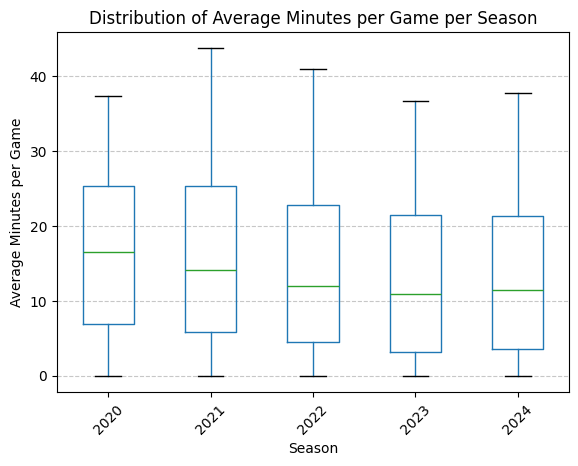

In [17]:
import matplotlib.pyplot as plt

# Step 1: Calculate each player's average minutes per season
player_avg_minutes_per_season = merged_df.groupby(["season", "player_id"])["minutes"].mean().reset_index()

# Step 2: Plot the distribution using a box plot
plt.figure(figsize=(12, 6))
player_avg_minutes_per_season.boxplot(column="minutes", by="season", grid=False, showfliers=False)

# Step 3: Customize the plot
plt.xlabel("Season")
plt.ylabel("Average Minutes per Game")
plt.title("Distribution of Average Minutes per Game per Season")
plt.suptitle("")  # Remove default Pandas boxplot title
plt.xticks(rotation=45)
plt.grid(True, axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

- The minimum minutes played is close to **0 minutes** in all seasons, meaning some players barely get playing time.
- The maximum minutes played is **above 40 minutes per game**, indicating that some players are playing near a full game.

Injured player data retrieved from API is for current injuries but past player abscence data is needed for model training. Use minutes played to determine if player was absent from a game.

In [18]:
# Convert to dictionary for faster lookup
player_avg_minutes = player_avg_minutes_per_season.set_index(["season", "player_id"])["minutes"].to_dict()

# Determine if a player is "unexpectedly out"
def was_absent(row):
    avg_minutes = player_avg_minutes.get((row["season"], row["player_id"]), 0)  # Default to 0 if not found
    return True if avg_minutes > 5 and row["minutes"] == 0 else False

# Apply function to create new column
merged_df["is_absent"] = merged_df.apply(was_absent, axis=1)

merged_df[merged_df["is_absent"]]

,date,season,status,home_team_id,home_team,visitor_team_id,visitor_team,home_score,visitor_score,player_id,...,offensive_rebound_percentage,rebound_percentage,true_shooting_percentage,turnover_ratio,usage_percentage,team_id,game_id,game_period,game_postseason,is_absent
7,2023-10-24,2023,Final,8,Denver Nuggets,14,Los Angeles Lakers,119,107,215,...,0.0,0.0,0.0,0.0,0.0,8.0,1037593.0,4.0,False,True
13,2023-10-24,2023,Final,8,Denver Nuggets,14,Los Angeles Lakers,119,107,56677776,...,0.0,0.0,0.0,0.0,0.0,8.0,1037593.0,4.0,False,True
32,2023-10-24,2023,Final,8,Denver Nuggets,14,Los Angeles Lakers,119,107,457,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
40,2023-10-24,2023,Final,10,Golden State Warriors,24,Phoenix Suns,104,108,56677799,...,0.0,0.0,0.0,0.0,0.0,10.0,1037594.0,4.0,False,True
44,2023-10-24,2023,Final,10,Golden State Warriors,24,Phoenix Suns,104,108,185,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189167,2025-03-11,2024,Final,19,New Orleans Pelicans,13,LA Clippers,127,120,358,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
189169,2025-03-11,2024,Final,19,New Orleans Pelicans,13,LA Clippers,127,120,380,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
189170,2025-03-11,2024,Final,19,New Orleans Pelicans,13,LA Clippers,127,120,417,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
189182,2025-03-11,2024,Final,19,New Orleans Pelicans,13,LA Clippers,127,120,147,...,0.0,0.0,0.0,0.0,0.0,13.0,15908674.0,4.0,False,True


In [19]:
# Drop rows where "is_absent" is False AND "minutes" is 0. These are players that play very little or not at all throughout the season.
merged_df = merged_df[~((merged_df["is_absent"] == False) & (merged_df["minutes"] == 0))]

# Reset index after filtering
merged_df.reset_index(drop=True, inplace=True)

print("✅ Rows where 'is_absent' is False and 'minutes' is 0 have been removed.")

✅ Rows where 'is_absent' is False and 'minutes' is 0 have been removed.


It's useful to know the performance value for any absent player in model training. Using rolling performance data of most recent 15 games and weights the player importance metric is calculated

In [20]:
# Calculate player importance and total impact of absent players per team per game

# Define player performance metrics for rolling averages
rolling_columns = ["minutes", "pie", "usage_percentage", "net_rating", "pts"]

# Ensure dataframe is sorted by player_id and date for rolling calculations
merged_df.sort_values(by=["player_id", "date"], inplace=True)

# Apply rolling averages within each player group
for col in rolling_columns:
    merged_df[f"{col}_rolling15"] = (
        merged_df.groupby("player_id")[col]
        .transform(lambda x: x.shift(1).rolling(window=15, min_periods=1).mean())
    )

# Compute player importance score using rolling averages
merged_df["player_importance"] = (
    merged_df["minutes_rolling15"] * 0.4 +  # Weight on playing time
    merged_df["pie_rolling15"] * 0.2 +      # Player Impact Estimate
    merged_df["usage_percentage_rolling15"] * 0.15 +  # How often they handle the ball
    merged_df["net_rating_rolling15"] * 0.15 +  # Net rating contribution
    merged_df["pts_rolling15"] * 0.1  # Scoring ability
)

# Aggregate total impact of absent players per team per game
team_absent_impact = (
    merged_df[merged_df["is_absent"] == 1]
    .groupby(["team_id", "game_id"])["player_importance"]
    .sum()
    .reset_index()
    .rename(columns={"player_importance": "team_absent_impact"})
)

# Export to csv -- will be used in upcoming game predictions
team_absent_impact.to_csv("team_absent_impact.csv", index=False)

In [21]:
# Display the number of missing values for each column
missing_values = merged_df.isnull().sum()
print("Missing values for each column:")
print(missing_values)

Missing values for each column:
date                                   0
season                                 0
status                                 0
home_team_id                           0
home_team                              0
visitor_team_id                        0
visitor_team                           0
home_score                             0
visitor_score                          0
player_id                              0
player_first_name                      0
player_last_name                       0
team                                   0
minutes                                0
field_goals_made                       0
field_goals_attempted                  0
field_goal_percentage                  0
three_pointers_made                    0
three_pointers_attempted               0
three_point_percentage                 0
free_throws_made                       0
free_throws_attempted                  0
free_throw_percentage                  0
oreb                     

In [22]:
# # Infer game_id based on date, home_team_id, and visitor_team_id
# merged_df["game_id"] = merged_df.groupby(["date", "home_team_id", "visitor_team_id"])["game_id"].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

# # Infer game_period based on game_id
# merged_df["game_period"] = merged_df.groupby("game_id")["game_period"].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

# # Infer game_postseason based on game_id
# merged_df["game_postseason"] = merged_df.groupby("game_id")["game_postseason"].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

In [23]:
# Infer game_id based on date, home_team_id, and visitor_team_id
merged_df["game_id"] = merged_df.groupby(["date", "home_team_id", "visitor_team_id"])["game_id"]\
    .transform(lambda x: x.ffill().bfill())

# Infer game_period based on game_id
merged_df["game_period"] = merged_df.groupby("game_id")["game_period"]\
    .transform(lambda x: x.ffill().bfill())

# Infer game_postseason based on game_id
merged_df["game_postseason"] = merged_df.groupby("game_id")["game_postseason"]\
    .transform(lambda x: x.ffill().bfill())


/var/folders/06/tsmhtwbn50g96r22ts4rsqzc0000gn/T/ipykernel_17429/2940269337.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .transform(lambda x: x.ffill().bfill())


In [24]:
merged_df["team_id"] = merged_df.apply(
    lambda row: row["home_team_id"] if pd.isna(row["team_id"]) and row["team"] == row["home_team"]
    else (row["visitor_team_id"] if pd.isna(row["team_id"]) and row["team"] == row["visitor_team"] else row["team_id"]),
    axis=1
)

In [25]:
# Define columns to fill with 0 if minutes == 0
performance_cols = [
    "pie", "pace", "assist_percentage", "assist_ratio", "assist_to_turnover",
    "defensive_rating", "defensive_rebound_percentage", "effective_field_goal_percentage",
    "net_rating", "offensive_rating", "offensive_rebound_percentage", "rebound_percentage",
    "true_shooting_percentage", "turnover_ratio", "usage_percentage"
]

# Fill NaN values with 0 where minutes == 0
merged_df.loc[merged_df["minutes"] == 0, performance_cols] = merged_df.loc[merged_df["minutes"] == 0, performance_cols].fillna(0)

print("✅ Performance metrics set to 0 for players with 0 minutes played.")

✅ Performance metrics set to 0 for players with 0 minutes played.


In [26]:
# Display the number of missing values for each column
missing_values = merged_df.isnull().sum()
print("Missing values for each column:")
print(missing_values)

# Display cleaned dataset
merged_df

# Export dataset as csv
merged_df.to_csv("game_stats_with_box_scores_merged.csv", index=False)

Missing values for each column:
date                                  0
season                                0
status                                0
home_team_id                          0
home_team                             0
visitor_team_id                       0
visitor_team                          0
home_score                            0
visitor_score                         0
player_id                             0
player_first_name                     0
player_last_name                      0
team                                  0
minutes                               0
field_goals_made                      0
field_goals_attempted                 0
field_goal_percentage                 0
three_pointers_made                   0
three_pointers_attempted              0
three_point_percentage                0
free_throws_made                      0
free_throws_attempted                 0
free_throw_percentage                 0
oreb                                  0
dreb    

## Aggregate player-game data into team-game data

In [27]:
# Aggregate Team Stats
team_aggregated_df = merged_df.groupby(["game_id", "team_id"]).agg({
    "minutes": "sum",
    "field_goals_made": "sum",
    "field_goals_attempted": "sum",
    "three_pointers_made": "sum",
    "three_pointers_attempted": "sum",
    "free_throws_made": "sum",
    "free_throws_attempted": "sum",
    "oreb": "sum",
    "dreb": "sum",
    "reb": "sum",
    "ast": "sum",
    "stl": "sum",
    "blk": "sum",
    "turnover": "sum",
    "pf": "sum",
    "pts": "sum",
    "pie": "sum",
    "is_absent" : "sum",

    # Weighted Shooting Percentages (using correct column names)
    "field_goal_percentage": lambda x: (x * merged_df.loc[x.index, "minutes"]).sum() / merged_df.loc[x.index, "minutes"].sum(),
    "three_point_percentage": lambda x: (x * merged_df.loc[x.index, "minutes"]).sum() / merged_df.loc[x.index, "minutes"].sum(),
    "free_throw_percentage": lambda x: (x * merged_df.loc[x.index, "minutes"]).sum() / merged_df.loc[x.index, "minutes"].sum(),
    "effective_field_goal_percentage": lambda x: (x * merged_df.loc[x.index, "minutes"]).sum() / merged_df.loc[x.index, "minutes"].sum(),
    "true_shooting_percentage": lambda x: (x * merged_df.loc[x.index, "minutes"]).sum() / merged_df.loc[x.index, "minutes"].sum(),

    # Advanced Metrics (Averaged)
    "pace": "mean",
    "assist_percentage": "mean",
    "assist_ratio": "mean",
    "assist_to_turnover": "mean",
    "defensive_rating": "mean",
    "defensive_rebound_percentage": "mean",
    "net_rating": "mean",
    "offensive_rating": "mean",
    "offensive_rebound_percentage": "mean",
    "rebound_percentage": "mean",
    "turnover_ratio": "mean",
    "usage_percentage": "mean",
}).reset_index()

### **🔹 Add New Features**
# Merge in game date
team_aggregated_df = team_aggregated_df.merge(merged_df[["game_id", "date"]].drop_duplicates(), on="game_id", how="left")

# Merge in home/away indicators, team names, scores, and game outcome
team_aggregated_df = team_aggregated_df.merge(
    merged_df[["game_id", "home_team_id", "season", "visitor_team_id", "home_team", "visitor_team", "home_score", "visitor_score", "game_postseason"]].drop_duplicates(),
    on="game_id", how="left"
)

# **Home/Away Indicator**
team_aggregated_df["is_home_game"] = team_aggregated_df["team_id"] == team_aggregated_df["home_team_id"]

# **Assign Team Name**
team_aggregated_df["team_name"] = team_aggregated_df.apply(
    lambda row: row["home_team"] if row["is_home_game"] else row["visitor_team"], axis=1
)

# **Team Points Scored**
team_aggregated_df["team_points"] = team_aggregated_df.apply(
    lambda row: row["home_score"] if row["is_home_game"] else row["visitor_score"], axis=1
)

# **Game Won or Lost**
team_aggregated_df["game_won"] = team_aggregated_df.apply(
    lambda row: (row["home_score"] > row["visitor_score"]) if row["is_home_game"] else (row["visitor_score"] > row["home_score"]),
    axis=1
)

# **Point Difference**
team_aggregated_df["point_diff"] = team_aggregated_df.apply(
    lambda row: abs(row["home_score"] - row["visitor_score"]), axis=1
)

# **Drop unnecessary columns**
team_aggregated_df.drop(columns=["home_team_id", "visitor_team_id", "home_team", "visitor_team", "home_score", "visitor_score"], inplace=True)

# **Rename is_absent to absent_players**
team_aggregated_df.rename(columns={"is_absent": "absent_players"}, inplace=True)

# Display final dataset
team_aggregated_df.head()

,game_id,team_id,minutes,field_goals_made,field_goals_attempted,three_pointers_made,three_pointers_attempted,free_throws_made,free_throws_attempted,oreb,...,turnover_ratio,usage_percentage,date,season,game_postseason,is_home_game,team_name,team_points,game_won,point_diff
0,127502.0,3.0,241.983333,42.0,92.0,15.0,35.0,26.0,32.0,13.0,...,13.460000,0.183067,2020-12-22,2020,False,True,Brooklyn Nets,125,True,26
1,127502.0,10.0,240.000000,37.0,99.0,10.0,33.0,15.0,23.0,13.0,...,11.415385,0.181615,2020-12-22,2020,False,False,Golden State Warriors,99,False,26
2,127503.0,13.0,241.233333,44.0,93.0,14.0,40.0,14.0,19.0,11.0,...,7.000000,0.165800,2020-12-22,2020,False,False,LA Clippers,116,True,7
3,127503.0,14.0,240.516667,38.0,81.0,9.0,29.0,24.0,31.0,8.0,...,15.691667,0.163833,2020-12-22,2020,False,True,Los Angeles Lakers,109,False,7
4,127504.0,4.0,239.800000,45.0,90.0,16.0,44.0,8.0,15.0,8.0,...,10.475000,0.157917,2020-12-23,2020,False,False,Charlotte Hornets,114,False,7


In [28]:
# Define the new column order for better readability
column_order = [
    "game_id", "date", "season", "team_id", "team_name", "is_home_game", "game_postseason" ,"game_won", "team_points", "point_diff",
    "minutes", "pts", "pie",
    "field_goals_made", "field_goals_attempted", "field_goal_percentage",
    "three_pointers_made", "three_pointers_attempted", "three_point_percentage",
    "free_throws_made", "free_throws_attempted", "free_throw_percentage",
    "effective_field_goal_percentage", "true_shooting_percentage",
    "oreb", "dreb", "reb", "offensive_rebound_percentage", "defensive_rebound_percentage", "rebound_percentage",
    "ast", "assist_percentage", "assist_ratio", "assist_to_turnover",
    "stl", "blk", "turnover", "turnover_ratio", "pf",
    "pace", "net_rating", "offensive_rating", "defensive_rating", "usage_percentage", "absent_players"
]

# Convert team_id to int (remove unnecessary float dtype)
team_aggregated_df["team_id"] = team_aggregated_df["team_id"].astype(int)

# Convert date to datetime format
team_aggregated_df["date"] = pd.to_datetime(team_aggregated_df["date"])

# Convert team_points and point_diff to int (since scores are always whole numbers)
team_aggregated_df["team_points"] = team_aggregated_df["team_points"].astype(int)
team_aggregated_df["point_diff"] = team_aggregated_df["point_diff"].astype(int)

# Convert 'game_postseason' column to int(0/1)
team_aggregated_df["game_postseason"] = team_aggregated_df["game_postseason"].astype(int)

# Convert 'game_won' column to int (0/1)
team_aggregated_df["game_won"] = team_aggregated_df["game_won"].astype(int)

# Reorder the columns
team_aggregated_df = team_aggregated_df[column_order]

# Display final dataset info
team_aggregated_df.info()

# Export to csv
team_aggregated_df.to_csv("team_aggregated_game_data.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12176 entries, 0 to 12175
Data columns (total 45 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   game_id                          12176 non-null  float64       
 1   date                             12176 non-null  datetime64[ns]
 2   season                           12176 non-null  int64         
 3   team_id                          12176 non-null  int64         
 4   team_name                        12176 non-null  object        
 5   is_home_game                     12176 non-null  bool          
 6   game_postseason                  12176 non-null  int64         
 7   game_won                         12176 non-null  int64         
 8   team_points                      12176 non-null  int64         
 9   point_diff                       12176 non-null  int64         
 10  minutes                          12176 non-null  float64  

### Feature Engineering

In [29]:
# Ensure sorting by team_id and date
team_aggregated_df.sort_values(by=["team_id", "date"], inplace=True)

# 1. For each team, compute difference in days between consecutive games within a season
team_aggregated_df.sort_values(by=["team_id", "date"], inplace=True)

team_aggregated_df['days_since_last_game'] = (
    team_aggregated_df.groupby(["team_id", "season"])["date"]
      .diff()
      .dt.days
)

# 2. Compute Win Streak (positive for winning streaks, negative for losing streaks)
def compute_win_streak(series):
    streak = (series.shift(1) * 2 - 1)  # Convert 1 -> 1 (win), 0 -> -1 (loss)
    return streak.groupby((streak != streak.shift()).cumsum()).cumcount() * streak
# Apply function and reset index to avoid misalignment issues
team_aggregated_df["win_streak"] = (
    team_aggregated_df.groupby("team_id")["game_won"]
    .apply(compute_win_streak)
    .reset_index(level=0, drop=True)  # Ensures correct indexing
)

# Sort by date before updating ELO:
team_aggregated_df.sort_values(by=["season", "date"], inplace=True)

# 3. Compute ELO Rating
def update_elo(elo_a, elo_b, score_a, k=20):
    """ELO rating update function"""
    expected_a = 1 / (1 + 10 ** ((elo_b - elo_a) / 400))
    change = k * (score_a - expected_a)
    return elo_a + change, elo_b - change

# Initialize Elo ratings
initial_elo = 1500
elo_ratings_all_time = {team: initial_elo for team in team_aggregated_df["team_id"].unique()}
season_elo_ratings = {}  # Dictionary to track season-based Elo ratings

team_aggregated_df["team_elo"] = np.nan  # All-time Elo
team_aggregated_df["opponent_elo"] = np.nan
team_aggregated_df["season_elo"] = np.nan  # Elo that resets each season
team_aggregated_df["opponent_season_elo"] = np.nan  # Opponent's season Elo

# Process ELO updates
for index, row in team_aggregated_df.iterrows():
    team_id = row["team_id"]
    game_id = row["game_id"]
    season = row["season"]

    # Reset season Elo ratings at the start of each season
    if season not in season_elo_ratings:
        season_elo_ratings[season] = {team: initial_elo for team in team_aggregated_df["team_id"].unique()}

    # Find opponent
    opponent = team_aggregated_df[(team_aggregated_df["game_id"] == game_id) & 
                                  (team_aggregated_df["team_id"] != team_id)]

    if not opponent.empty:
        opponent_id = opponent.iloc[0]["team_id"]

        # Assign all-time Elo ratings
        if pd.isna(team_aggregated_df.at[index, "team_elo"]):
            team_aggregated_df.at[index, "team_elo"] = elo_ratings_all_time.get(team_id, initial_elo)
        if pd.isna(team_aggregated_df.at[index, "opponent_elo"]):
            team_aggregated_df.at[index, "opponent_elo"] = elo_ratings_all_time.get(opponent_id, initial_elo)

        # Assign season Elo ratings
        if pd.isna(team_aggregated_df.at[index, "season_elo"]):
            team_aggregated_df.at[index, "season_elo"] = season_elo_ratings[season].get(team_id, initial_elo)
        if pd.isna(team_aggregated_df.at[index, "opponent_season_elo"]):
            team_aggregated_df.at[index, "opponent_season_elo"] = season_elo_ratings[season].get(opponent_id, initial_elo)

        # Get current ELOs
        team_elo = team_aggregated_df.at[index, "team_elo"]
        opponent_elo = team_aggregated_df.at[index, "opponent_elo"]

        season_elo = team_aggregated_df.at[index, "season_elo"]
        opponent_season_elo = team_aggregated_df.at[index, "opponent_season_elo"]

        # Update Elo based on game result
        score_a = 1 if row["game_won"] else 0
        new_team_elo, new_opponent_elo = update_elo(team_elo, opponent_elo, score_a)
        new_season_team_elo, new_season_opponent_elo = update_elo(season_elo, opponent_season_elo, score_a)

        # Update dictionaries
        elo_ratings_all_time[team_id] = new_team_elo
        elo_ratings_all_time[opponent_id] = new_opponent_elo

        season_elo_ratings[season][team_id] = new_season_team_elo
        season_elo_ratings[season][opponent_id] = new_season_opponent_elo

# 4. Compute Time-in-Season (Days since the first game of the season)
season_start_dates = team_aggregated_df.groupby("season")["date"].min().to_dict()
team_aggregated_df["time_in_season"] = team_aggregated_df.apply(lambda row: (row["date"] - season_start_dates[row["season"]]).days +1, axis=1)

In [30]:
# Display subset of data for visual validation
selected_columns = [
    "game_id", "date", "season", "team_id", "team_name", "is_home_game",
    "game_postseason", "game_won", "win_streak", "team_elo", "opponent_elo",
    "season_elo", "opponent_season_elo", "time_in_season"
]

# Filter for team_id 2 in season 2024 and select only the specified columns
filtered_df = team_aggregated_df.loc[
    (team_aggregated_df["team_id"] == 2) & (team_aggregated_df["season"] == 2024),
    selected_columns
]

# Display the filtered dataframe
filtered_df

,game_id,date,season,team_id,team_name,is_home_game,game_postseason,game_won,win_streak,team_elo,opponent_elo,season_elo,opponent_season_elo,time_in_season
10230,15907438.0,2024-10-22,2024,2,Boston Celtics,True,0,1,0.0,1817.998343,1596.433285,1500.000000,1500.000000,1
10254,15907450.0,2024-10-24,2024,2,Boston Celtics,False,0,1,1.0,1826.562343,1235.562439,1519.424989,1500.000000,3
10286,15907466.0,2024-10-26,2024,2,Boston Celtics,False,0,1,2.0,1827.846964,1232.387135,1537.768329,1463.304026,5
10316,15907481.0,2024-10-28,2024,2,Boston Celtics,True,0,1,3.0,1829.100154,1465.856546,1553.116794,1476.481770,7
10346,15907496.0,2024-10-30,2024,2,Boston Celtics,False,0,0,4.0,1833.450062,1524.255421,1568.350492,1459.085112,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11952,15908597.0,2025-03-02,2024,2,Boston Celtics,True,0,1,-1.0,1665.113877,1658.207975,1642.485822,1647.803801,132
12002,15908622.0,2025-03-05,2024,2,Boston Celtics,True,0,1,0.0,1684.153638,1538.316721,1662.207749,1545.801824,135
12020,15908631.0,2025-03-06,2024,2,Boston Celtics,True,0,1,1.0,1695.930675,1350.302320,1675.402340,1350.075810,136
12056,15908649.0,2025-03-08,2024,2,Boston Celtics,True,0,1,2.0,1700.684642,1690.264532,1680.661332,1683.548152,138


In [31]:
# Import NBA games basic data

# Define the file path pattern for multiple seasons
file_pattern = "./New_data/nba_games_*.csv"

# Get list of all matching CSV files
csv_files = glob.glob(file_pattern)

# Load and combine all CSV files into a single DataFrame excluding game_time column as it's causing an error due to inconsistent data types
df_list = [pd.read_csv(file) for file in csv_files]
nba_games = pd.concat(df_list, ignore_index=True)

# Drop duplicated rows
nba_games = nba_games.drop_duplicates()

# Display basic information
nba_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6279 entries, 0 to 6399
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         6279 non-null   int64  
 1   date                       6279 non-null   object 
 2   season                     6279 non-null   int64  
 3   status                     6279 non-null   object 
 4   period                     6279 non-null   float64
 5   time                       3573 non-null   object 
 6   postseason                 6279 non-null   bool   
 7   home_team_score            6279 non-null   float64
 8   visitor_team_score         6279 non-null   float64
 9   home_team_id               0 non-null      float64
 10  home_team_conference       6279 non-null   object 
 11  home_team_division         6279 non-null   object 
 12  home_team_city             6279 non-null   object 
 13  home_team_name             6279 non-null   object 
 1

In [32]:
# Merge home_team_city from nba_games into team_aggregated_df based on game_id
team_aggregated_df = team_aggregated_df.merge(
    nba_games[["id", "home_team_city"]],  # Select relevant columns from nba_games
    left_on="game_id", 
    right_on="id", 
    how="left"
)

# Rename the merged column to "game_city"
team_aggregated_df.rename(columns={"home_team_city": "game_city"}, inplace=True)

# Drop redundant 'id' column from nba_games after merge
team_aggregated_df.drop(columns=["id"], inplace=True)

In [33]:
# Check city names
team_aggregated_df["game_city"].dropna().unique()

array(['Brooklyn', 'Los Angeles', 'Chicago', 'Boston', 'Cleveland',
       'Phoenix', 'Denver', 'Minnesota', 'Indiana', 'Memphis', 'Orlando',
       'Toronto', 'Philadelphia', 'Portland', 'Milwaukee', 'Miami',
       'Charlotte', 'Detroit', 'Utah', 'New York', 'Washington',
       'Sacramento', 'San Antonio', 'LA', 'New Orleans', 'Atlanta',
       'Oklahoma City', 'Dallas', 'Houston', 'Golden State'], dtype=object)

In [34]:
# Fix city names
city_mapping = {
    "Utah": "Salt Lake City",
    "Minnesota": "Minneapolis",
    "LA": "Los Angeles",
    "Golden State": "San Francisco",
    "Indiana": "Indianapolis"
}

# Apply the mapping
team_aggregated_df["game_city"] = team_aggregated_df["game_city"].replace(city_mapping)

In [35]:
# Lat & lon for NBA team cities
city_coords = {
    "Atlanta": (33.7490, -84.3880),
    "Boston": (42.3601, -71.0589),
    "Brooklyn": (40.6782, -73.9442),
    "Charlotte": (35.2271, -80.8431),
    "Chicago": (41.8781, -87.6298),
    "Cleveland": (41.4993, -81.6944),
    "Dallas": (32.7767, -96.7970),
    "Denver": (39.7392, -104.9903),
    "Detroit": (42.3314, -83.0458),
    "Houston": (29.7604, -95.3698),
    "Indianapolis": (39.7684, -86.1581),
    "Los Angeles": (34.0522, -118.2437),
    "Memphis": (35.1495, -90.0490),
    "Miami": (25.7617, -80.1918),
    "Milwaukee": (43.0389, -87.9065),
    "Minneapolis": (44.9778, -93.2650),
    "New Orleans": (29.9511, -90.0715),
    "New York": (40.7128, -74.0060),
    "Oklahoma City": (35.4676, -97.5164),
    "Orlando": (28.5383, -81.3792),
    "Philadelphia": (39.9526, -75.1652),
    "Phoenix": (33.4484, -112.0740),
    "Portland": (45.5152, -122.6784),
    "Sacramento": (38.5816, -121.4944),
    "San Antonio": (29.4241, -98.4936),
    "Salt Lake City": (40.7608, -111.8910),
    "San Francisco": (37.7749, -122.4194),
    "Toronto": (43.651070, -79.347015),
    "Washington": (38.9072, -77.0369)
}

# Extract unique non-null game_city values
unique_game_cities = team_aggregated_df["game_city"].dropna().unique()

# Find cities that are not in city_coords
missing_cities = [city for city in unique_game_cities if city not in city_coords]

# Display results
if missing_cities:
    print("❌ The following cities are missing from city_coords:", missing_cities)
else:
    print("✅ All game_city values are present in city_coords.")

✅ All game_city values are present in city_coords.


In [36]:
# Check for missing values in game_city
team_aggregated_df["game_city"].isnull().sum()

np.int64(152)

In [37]:
# Infer missing values for game_city values:

# Create a Mapping: team_id -> home_city (from rows where is_home_game is true)
home_games = team_aggregated_df[(team_aggregated_df['is_home_game'] == 1) & (team_aggregated_df['game_city'].notna())]
team_home_city = home_games.groupby('team_id')['game_city'].first().to_dict()
print("Team Home City Mapping (sample):", dict(list(team_home_city.items())[:5]))

# Fill Missing game_city for Home Games Using the Mapping
mask_home_missing = (team_aggregated_df['is_home_game'] == 1) & (team_aggregated_df['game_city'].isna())
team_aggregated_df.loc[mask_home_missing, 'game_city'] = team_aggregated_df.loc[mask_home_missing, 'team_id'].map(team_home_city)

# Fill Missing game_city for Remaining Rows by Grouping by game_id 
team_aggregated_df['game_city'] = team_aggregated_df.groupby('game_id')['game_city'].transform(lambda x: x.ffill().bfill())

# Report Missing Values
missing_after = team_aggregated_df['game_city'].isna().sum()
print("Missing game_city count after filling:", missing_after)

Team Home City Mapping (sample): {1: 'Atlanta', 2: 'Boston', 3: 'Brooklyn', 4: 'Charlotte', 5: 'Chicago'}
Missing game_city count after filling: 0


In [38]:
from geopy.distance import geodesic

# Ensure dataset is sorted by team_id, season, and date
team_aggregated_df.sort_values(["team_id", "season", "date"], inplace=True)

# Function to calculate travel distance using city_coords dictionary
def calc_travel_distance(row):
    # Get current and previous game city
    current_city = row["game_city"]
    prev_city = row["prev_game_city"]

    # If it's the first game of the season or game_city is missing/null, return NaN
    if pd.isna(prev_city) or pd.isna(current_city):
        return np.nan  # Return NaN instead of 0

    # Get coordinates from city_coords dictionary
    if current_city in city_coords and prev_city in city_coords:
        lat1, lon1 = city_coords[prev_city]
        lat2, lon2 = city_coords[current_city]
        return int(round(geodesic((lat1, lon1), (lat2, lon2)).miles))  # Convert to integer miles

    return np.nan  # Return NaN if cities are not found in city_coords

# Create a column for the "previous" game city per team per season
team_aggregated_df["prev_game_city"] = (
    team_aggregated_df.groupby(["team_id", "season"])["game_city"].shift(1)
)

# Apply the function to calculate travel distance
team_aggregated_df["travel_distance"] = team_aggregated_df.apply(calc_travel_distance, axis=1)

print("✅ Travel distances calculated in miles. First game of season or missing city returns NaN!")

✅ Travel distances calculated in miles. First game of season or missing city returns NaN!


In [39]:
# Merge impact of absent players per team per game to team_aggregated_df
team_aggregated_df = team_aggregated_df.merge(
    team_absent_impact, on=["team_id", "game_id"], how="left"
)

# Fill NaN values (if no absences, impact should be 0)
team_aggregated_df["team_absent_impact"] = team_aggregated_df["team_absent_impact"].fillna(0)

In [40]:
# Create 15-game rolling average team performance metrics

# Sort by team_id, then by date
team_aggregated_df.sort_values(by=["team_id", "date"], inplace=True)

# Define columns for rolling averages
rolling_columns = [
    "team_points",
    "point_diff",
    "pts",
    "pie",
    "field_goals_made",
    "field_goals_attempted",
    "field_goal_percentage",
    "three_pointers_made",
    "three_pointers_attempted",
    "three_point_percentage",
    "free_throws_made",
    "free_throws_attempted",
    "free_throw_percentage",
    "effective_field_goal_percentage",
    "true_shooting_percentage",
    "oreb",
    "dreb",
    "reb",
    "offensive_rebound_percentage",
    "defensive_rebound_percentage",
    "rebound_percentage",
    "ast",
    "assist_percentage",
    "assist_ratio",
    "assist_to_turnover",
    "stl",
    "blk",
    "turnover",
    "turnover_ratio",
    "pf",
    "pace",
    "net_rating",
    "offensive_rating",
    "defensive_rating",
    "usage_percentage"
]

# Use transform to ensure alignment with the original DataFrame
for col in rolling_columns:
    team_aggregated_df[f"{col}_rolling15"] = (
        team_aggregated_df.groupby("team_id")[col]
        .transform(lambda x: x.shift(1).rolling(window=15, min_periods=1).mean())
    )


# Inspect results
team_aggregated_df.head(10)

,game_id,date,season,team_id,team_name,is_home_game,game_postseason,game_won,team_points,point_diff,...,stl_rolling15,blk_rolling15,turnover_rolling15,turnover_ratio_rolling15,pf_rolling15,pace_rolling15,net_rating_rolling15,offensive_rating_rolling15,defensive_rating_rolling15,usage_percentage_rolling15
0,127510.0,2020-12-23,2020,1,Atlanta Hawks,False,0,1,124,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,127528.0,2020-12-26,2020,1,Atlanta Hawks,False,0,1,122,10,...,6.000000,3.000000,21.000000,18.833333,29.000000,105.230833,-1.366667,100.441667,101.783333,0.198167
2,127542.0,2020-12-28,2020,1,Atlanta Hawks,True,0,1,128,8,...,5.000000,4.000000,18.000000,14.345833,24.500000,96.762917,1.416667,97.850000,96.420833,0.179083
3,127559.0,2020-12-30,2020,1,Atlanta Hawks,False,0,0,141,4,...,5.000000,5.000000,16.333333,12.547222,23.666667,92.830278,3.569444,100.622222,97.038889,0.171167
4,127574.0,2021-01-01,2020,1,Atlanta Hawks,False,0,1,114,18,...,5.000000,4.250000,15.250000,12.891667,22.500000,94.405625,0.081250,105.460417,105.368750,0.169437
5,127581.0,2021-01-02,2020,1,Atlanta Hawks,True,0,0,91,5,...,5.600000,4.000000,14.000000,11.207179,22.000000,94.289423,3.278846,102.219103,98.928846,0.161781
6,127596.0,2021-01-04,2020,1,Atlanta Hawks,True,0,0,108,5,...,6.166667,4.166667,15.000000,11.315983,21.666667,94.874686,0.649038,99.687585,99.030705,0.164134
7,127611.0,2021-01-06,2020,1,Atlanta Hawks,True,0,0,94,8,...,5.857143,3.857143,14.571429,10.416557,21.571429,94.116731,-1.417967,98.847930,100.262033,0.161515
8,127641.0,2021-01-09,2020,1,Atlanta Hawks,False,0,0,105,8,...,5.875000,3.500000,14.375000,10.134487,22.000000,95.498639,-3.383221,97.046939,100.424279,0.163538
9,127655.0,2021-01-11,2020,1,Atlanta Hawks,True,0,1,112,18,...,6.333333,3.555556,14.333333,9.880150,22.000000,94.752730,-3.431550,97.680107,101.107440,0.163458


In [41]:
team_aggregated_df[team_aggregated_df["team_points_rolling15"].isna()].count()

game_id                       30
date                          30
season                        30
team_id                       30
team_name                     30
                              ..
pace_rolling15                 0
net_rating_rolling15           0
offensive_rating_rolling15     0
defensive_rating_rolling15     0
usage_percentage_rolling15     0
Length: 91, dtype: int64

Makes sense since there are 30 teams and rolling performance metrics can't be computed for the first game for each team 

In [42]:
# Organizing columns for readability

# Define the columns that should be moved to the end
columns_to_move = ["absent_players", "team_absent_impact", "days_since_last_game", "game_city", "travel_distance", "win_streak", "team_elo", "opponent_elo",
    "season_elo", "opponent_season_elo", "time_in_season"]

# Get the remaining columns in their current order, excluding the ones to move
remaining_columns = [col for col in team_aggregated_df.columns if col not in columns_to_move]

# Define the new column order
ordered_columns = remaining_columns + columns_to_move

# Apply the new column order to the dataframe
team_aggregated_df = team_aggregated_df[ordered_columns]

In [43]:
team_aggregated_df.sample(5)

,game_id,date,season,team_id,team_name,is_home_game,game_postseason,game_won,team_points,point_diff,...,team_absent_impact,days_since_last_game,game_city,travel_distance,win_streak,team_elo,opponent_elo,season_elo,opponent_season_elo,time_in_season
5966,892498.0,2023-04-19,2022,15,Memphis Grizzlies,True,1,1,103,10,...,0.000000,3.0,Memphis,0.0,-1.0,1573.809639,1622.968577,1572.338247,1624.218390,184
3047,857489.0,2022-11-05,2022,8,Denver Nuggets,True,0,1,126,25,...,0.000000,2.0,Denver,505.0,0.0,1525.419057,1486.780571,1534.078421,1510.571658,19
5223,1038724.0,2024-04-07,2023,13,LA Clippers,True,0,1,120,2,...,3.692320,2.0,Los Angeles,0.0,1.0,1595.125381,1479.279029,1592.734184,1476.690018,167
6870,1038184.0,2024-01-20,2023,17,Milwaukee Bucks,False,0,1,141,6,...,10.945521,3.0,Detroit,90.0,-0.0,1615.766736,1138.482859,1606.423541,1206.273510,89
9742,1038366.0,2024-02-13,2023,24,Phoenix Suns,True,0,1,130,5,...,8.612715,3.0,Phoenix,654.0,-0.0,1584.524095,1539.180039,1579.941685,1536.141846,113


In [44]:
# Count occurrences of each game_id
game_id_counts = team_aggregated_df["game_id"].value_counts()

# Identify game_ids that do not appear exactly twice
incorrect_game_id_counts = game_id_counts[game_id_counts != 2]

# Display the problematic game_ids (if any)
incorrect_game_id_counts

Series([], Name: count, dtype: int64)

Each game_id has two rows, one for the home team and one for away team

In [45]:
team_aggregated_df[team_aggregated_df["game_id"] == 15907617]

,game_id,date,season,team_id,team_name,is_home_game,game_postseason,game_won,team_points,point_diff,...,team_absent_impact,days_since_last_game,game_city,travel_distance,win_streak,team_elo,opponent_elo,season_elo,opponent_season_elo,time_in_season
362,15907617.0,2024-11-15,2024,1,Atlanta Hawks,True,0,1,129,12,...,4.539603,3.0,Atlanta,937.0,0.0,1421.394398,1236.582605,1473.610234,1406.898358,25
12122,15907617.0,2024-11-15,2024,30,Washington Wizards,False,0,0,117,12,...,5.322499,2.0,Atlanta,883.0,-5.0,1231.451163,1426.525839,1398.795226,1481.713367,25


### Data Analysis

=== Summary Statistics for Key Numeric Columns ===
        team_points    point_diff           reb           ast  \
count  12176.000000  12176.000000  12176.000000  12176.000000   
mean     112.718134     12.174770     43.877792     25.406373   
std       12.695999      9.117387      6.638325      5.147670   
min       66.000000      1.000000     14.000000      8.000000   
25%      104.000000      5.000000     39.000000     22.000000   
50%      113.000000     10.000000     44.000000     25.000000   
75%      121.000000     17.000000     48.000000     29.000000   
max      176.000000     73.000000     74.000000     50.000000   

       field_goal_percentage  three_point_percentage  free_throw_percentage  \
count           12176.000000            12176.000000           12176.000000   
mean                0.555760                0.352875               0.617436   
std                 2.042527                1.272114               2.381976   
min                 0.260987                0.0

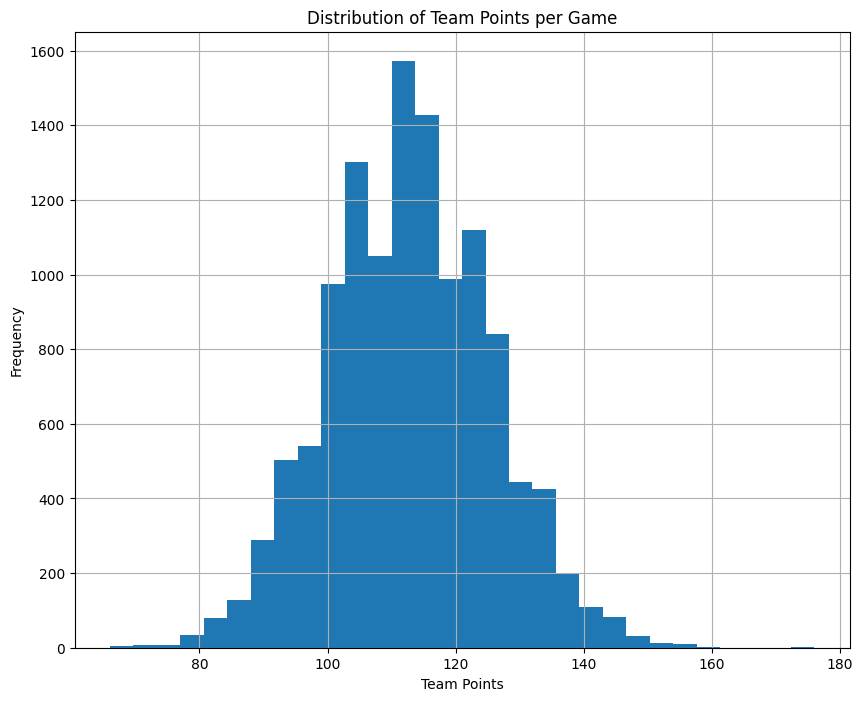

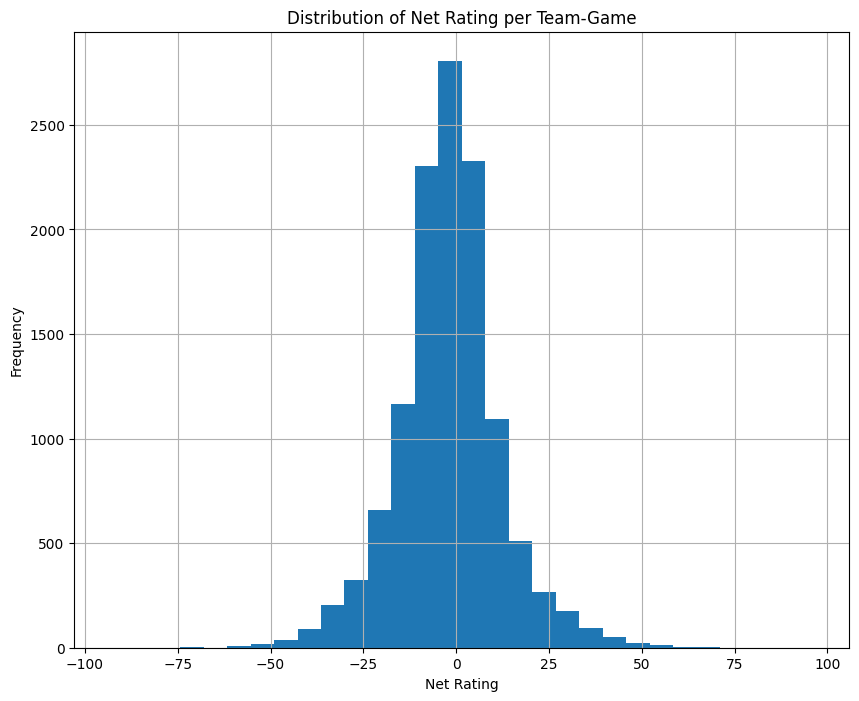

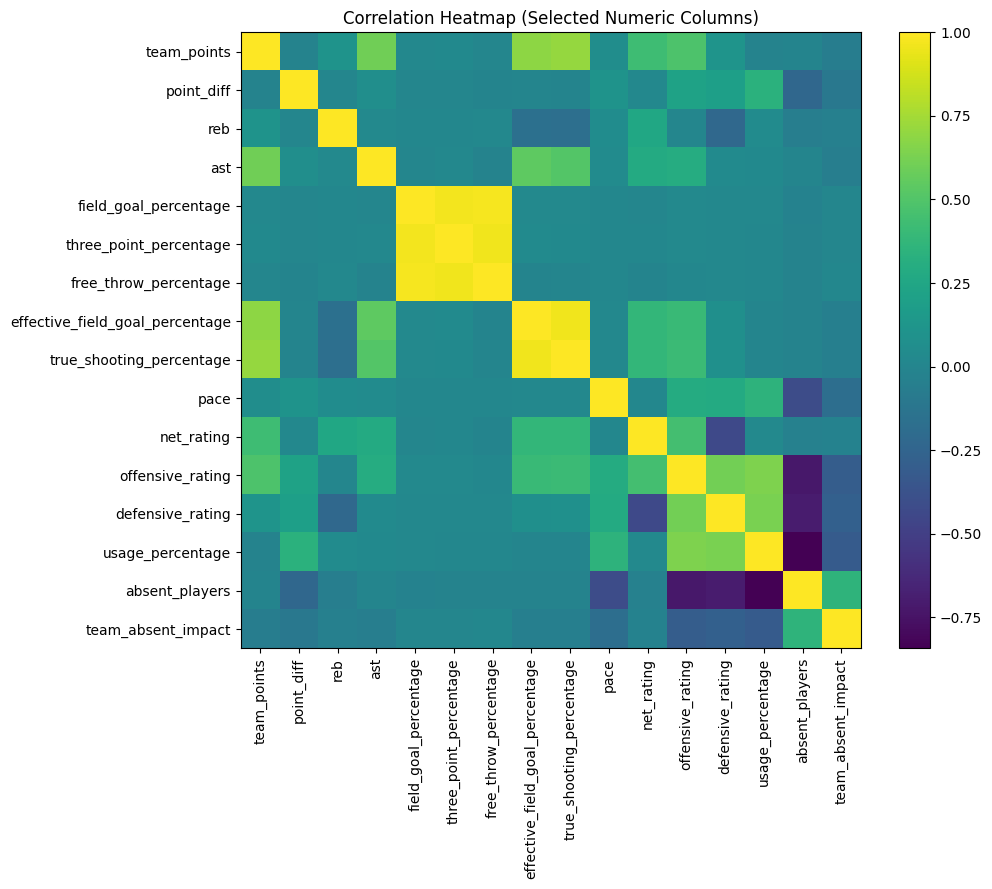

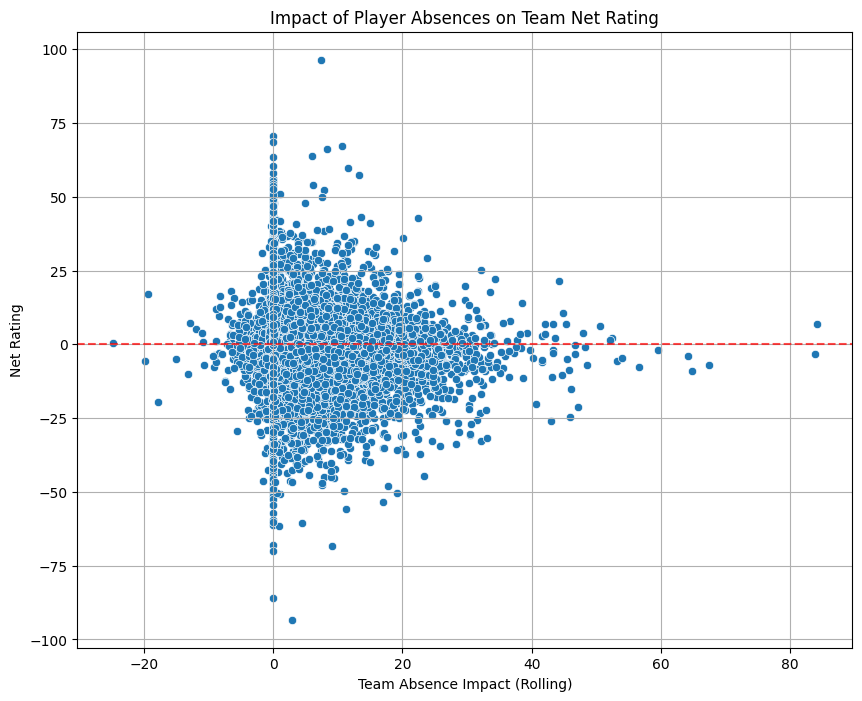

Home Win Rate: 55.4%


,date,team_name,team_points
10441,2023-02-24,Sacramento Kings,176
5120,2023-02-24,LA Clippers,175
1389,2022-01-26,Charlotte Hornets,158
3941,2023-04-09,Golden State Warriors,157
4733,2023-11-21,Indiana Pacers,157


,team_points,pace,offensive_rating
season,,,
2020,111.93,89.82,94.01
2021,110.18,89.34,94.37
2022,114.33,79.03,84.60
2023,113.64,80.67,85.12
2024,113.65,80.55,84.51


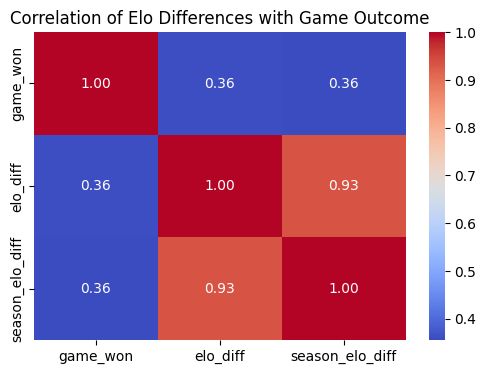

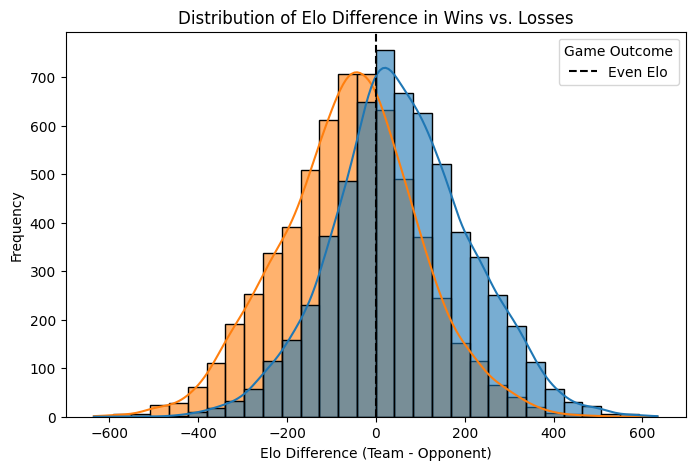

In [46]:
import seaborn as sns
import plotly.express as px

# Summary Statistics (Key Numeric Columns)
numeric_cols = [
    "team_points", "point_diff", "reb", "ast",
    "field_goal_percentage", "three_point_percentage",
    "free_throw_percentage", "effective_field_goal_percentage",
    "true_shooting_percentage", "pace", "net_rating",
    "offensive_rating", "defensive_rating", "usage_percentage", "absent_players", "team_absent_impact"
]
print("=== Summary Statistics for Key Numeric Columns ===")
print(team_aggregated_df[numeric_cols].describe())

# Distribution of Team Points
plt.figure(figsize=(10, 8))
team_aggregated_df["team_points"].hist(bins=30)
plt.title("Distribution of Team Points per Game")
plt.xlabel("Team Points")
plt.ylabel("Frequency")
plt.show()

# Distribution of Net Rating
plt.figure(figsize=(10, 8))
team_aggregated_df["net_rating"].hist(bins=30)
plt.title("Distribution of Net Rating per Team-Game")
plt.xlabel("Net Rating")
plt.ylabel("Frequency")
plt.show()

# Correlation Heatmap
corr_matrix = team_aggregated_df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
cax = plt.imshow(corr_matrix, cmap="viridis", aspect="auto")
plt.colorbar(cax)
plt.title("Correlation Heatmap (Selected Numeric Columns)")
# Set tick marks
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=90)
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.show()

# Scatter plot of team_absent_impact vs net_rating
plt.figure(figsize=(10, 8))
sns.scatterplot(x=team_aggregated_df["team_absent_impact"], y=team_aggregated_df["net_rating"])
plt.axhline(0, color='r', linestyle='--', alpha=0.7)  # Reference line at net rating = 0
plt.xlabel("Team Absence Impact (Rolling)")
plt.ylabel("Net Rating")
plt.title("Impact of Player Absences on Team Net Rating")
plt.grid(True)
plt.show()

# Home vs. Away Win Rate
# Ensure we have the correct boolean columns
if "is_home_game" in team_aggregated_df.columns and "game_won" in team_aggregated_df.columns:
    home_wins = team_aggregated_df[(team_aggregated_df["is_home_game"] == True) & (team_aggregated_df["game_won"] == True)]
    away_wins = team_aggregated_df[(team_aggregated_df["is_home_game"] == False) & (team_aggregated_df["game_won"] == True)]
    home_win_rate = len(home_wins) / (len(home_wins) + len(away_wins)) if (len(home_wins) + len(away_wins))>0 else 0
    print(f"Home Win Rate: {home_win_rate:.1%}")
else:
    print("Couldn't compute home-away stats (missing columns).")

# Check Extreme Outliers:
display(team_aggregated_df.nlargest(5, "team_points")[["date", "team_name", "team_points"]])

# Season-by-Season Averages
season_summary = team_aggregated_df.groupby("season")[["team_points", "pace", "offensive_rating"]].mean().round(2)
display(season_summary.head(10))


# Plot Team ELO Rating Over Time (2020 Season)
# Filter data for the 2020 season
df_2020 = team_aggregated_df[team_aggregated_df["season"] == 2020]
# Create an interactive line plot
fig = px.line(df_2020, x="date", y="team_elo", color="team_name", 
              hover_data={"team_name": True, "team_elo": True},
              title="Team ELO Rating Over Time (2020 Season)",
              labels={"team_elo": "ELO Rating", "date": "Date", "team_name": "Team"}
)
# Set the figure height
fig.update_layout(height=800)
# Show the plot
fig.show()


# Plot for Difference Between All-Time Elo and Season Elo Over Time
# Ensure data is sorted by date
team_aggregated_df = team_aggregated_df.sort_values(by=["season", "date"])
# Compute the difference between all-time Elo and season Elo
team_aggregated_df["elo_difference"] = team_aggregated_df["team_elo"] - team_aggregated_df["season_elo"]
# Create an interactive line plot
fig = px.line(
    team_aggregated_df,
    x="date",
    y="elo_difference",
    color="team_name",
    hover_data={"team_name": True, "elo_difference": True, "season": True},
    title="Difference Between All-Time Elo and Season Elo Over Time",
    labels={"elo_difference": "Elo Difference (All-Time - Season)", "date": "Date", "team_name": "Team"}
)
# Set the figure height
fig.update_layout(height=800)
# Show interactive plot
fig.show()


# Correlation heatmap of Elo Differences with Game Outcome
# Compute Elo differences
team_aggregated_df["elo_diff"] = team_aggregated_df["team_elo"] - team_aggregated_df["opponent_elo"]
team_aggregated_df["season_elo_diff"] = team_aggregated_df["season_elo"] - team_aggregated_df["opponent_season_elo"]
# Select relevant columns for correlation
correlation_df = team_aggregated_df[["game_won", "elo_diff", "season_elo_diff"]]
# Compute correlation matrix
correlation_matrix = correlation_df.corr()
# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation of Elo Differences with Game Outcome")
plt.show()


# Distribution of Elo Difference in Wins vs. Losses
# Create a new column to classify games as wins or losses
team_aggregated_df["win_category"] = team_aggregated_df["game_won"].map({1: "Win", 0: "Loss"})
# Plot the distribution of Elo differences for wins and losses
plt.figure(figsize=(8, 5))
sns.histplot(data=team_aggregated_df, x="elo_diff", hue="win_category", kde=True, bins=30, alpha=0.6)
plt.axvline(x=0, color="black", linestyle="--", label="Even Elo")
plt.xlabel("Elo Difference (Team - Opponent)")
plt.ylabel("Frequency")
plt.title("Distribution of Elo Difference in Wins vs. Losses")
plt.legend(title="Game Outcome")
plt.show()

Below are the key takeaways from the charts, correlation heatmaps, and summary statistics related to NBA team game performance and Elo ratings. The data cover both in-game performance metrics (points, shooting percentages, net rating, etc.) and broader team-level metrics (Elo rating trends, player absences, etc.).

---

1. #### Scoring and In-Game Performance

- **Team Points Distribution**
  - The histogram of team points per game is roughly bell-shaped, centered around 110–120 points.
  - Most teams score between 100 and 125 points in a typical game, but there are notable outliers, with the maximum reaching 176 points.
- **High-Scoring Outliers**
  - Examples include Sacramento Kings (176) and LA Clippers (175) in the same high-scoring game, indicating rare but extreme offensive outputs.
- **Summary Statistics**
  - **Mean Points:** ~113 per game, with a standard deviation of ~13.
  - **Assist/Rebound Averages:** Teams typically gather ~25 assists and ~44 rebounds.
  - **Shooting Efficiency:**
    - Median field-goal percentage around 46–47% (depending on how it’s scaled in the dataset).
    - Effective Field Goal Percentage (eFG%) and True Shooting Percentage (TS%) both center in the mid-50% range, which aligns with modern NBA’s emphasis on efficiency.
- **Pace and Offensive Rating Over Recent Seasons**
  - From 2020 to 2021, pace was ~89 possessions per game, then it dropped to ~79–80 in 2022–2024.
  - Despite the drop in pace, average points remain around 113, suggesting teams may be scoring efficiently even at a slower tempo.
  - Offensive rating (points per 100 possessions) appears lower in 2022–2024 than in 2020–2021—possibly reflecting changes in how possessions or ratings were tracked, or a shift in playing style.

---

2. #### Net Rating and Point Differentials

- **Net Rating Distribution**
  - Net rating (offensive rating – defensive rating) is centered near zero, with most teams clustering within ±15.
  - The symmetric shape indicates that for every big win (high positive net rating), there are roughly as many big losses (high negative net rating).
- **Correlation Insights**
  - **Point Differential & Net Rating:** Strongly correlated (as expected). Higher point differentials strongly align with higher net ratings.
  - **Offensive/Defensive Ratings:** Both correlate strongly with net rating (since net rating is essentially the difference).
  - **Shooting Percentages:** Moderate positive correlation with team points and net rating, highlighting that efficient shooting drives better outcomes.

---

3. #### Impact of Player Absences

- **Team Absence Impact vs. Net Rating**
  - The scatter plot shows that as the “Team Absence Impact” moves further from zero (indicating key players missing or major lineup disruptions), net ratings become more volatile.
  - While there is not a perfectly linear relationship, games with many key absences tend to yield larger negative net ratings, confirming that missing important contributors often hurts performance.
- **Average Absences**
  - Teams miss about 2.5 players per game on average (some combination of injuries, rest, etc.).
  - The data suggest that deeper rosters or effective replacements can mitigate the downside of absences, but the risk of negative impact grows when multiple key players are out.

---

4. #### Home-Court Advantage

- **Home Win Rate**
  - At 55.4%, home teams do win more often. This aligns with long-standing NBA trends of home-court advantage.
  - Though not overwhelming, it’s enough to be a meaningful factor when predicting outcomes.

---

5. #### Elo Ratings and Game Outcomes

- **Elo Rating Over Time**
  - Team Elo lines fluctuate through the season, reflecting winning and losing streaks. Some teams trend consistently upward, while others experience sharper rises and falls.
- **All-Time Elo vs. Season Elo**
  - The “difference” plots show how a team’s historical baseline compares to its current-season performance. Some teams may outplay their legacy Elo, while others underperform relative to historical standards.
- **Correlation with Game Outcomes**
  - **Elo Difference & Winning:** A moderate correlation (~0.36) indicates that while having a higher Elo than an opponent improves winning odds, it is far from a guarantee. Upsets do happen regularly.
  - **Distribution of Elo Differences:** The overlapping histograms for wins vs. losses show that most winning teams do have a positive Elo difference (Team – Opponent > 0), but the overlap area underscores that lower-rated teams can still win.
- **Season Elo vs. All-Time Elo**
  - The strong correlation (0.93) between season Elo difference and all-time Elo difference simply reflects that teams that exceed (or lag behind) their typical Elo in a given season often continue that pattern over shorter spans.

---

6. #### Overall Conclusions

1. **Scoring Trends**
   - The league’s average scoring sits around 112–113 points per game. Despite pace fluctuations, scoring remains robust—teams are maintaining or increasing efficiency over time.
2. **Efficiency Matters**
   - Strong correlations between net rating, shooting percentages, and point differentials underscore that effective shooting is a key driver of success.
3. **Player Availability**
   - Missing key players negatively affects net rating, but the relationship is not one-size-fits-all. Some teams manage absences better than others, indicating depth and coaching adaptability.
4. **Home Advantage**
   - While a 55.4% home win rate is meaningful, it’s not as large a gap as in some other sports. Still, home-court advantage is a factor worth considering in predictions.
5. **Elo Ratings**
   - Elo remains a decent predictor (positive correlation with game outcomes), but the moderate coefficient suggests the NBA has enough parity to produce frequent upsets.
   - Seasonal fluctuations and differences from historical Elo reveal which teams are improving or declining relative to their franchise’s long-term norms.
6. **Data Outliers and Shifts**
   - Extremely high-scoring games (150+ points) and unusual pace values indicate either exceptional performances or possible data-tracking anomalies.
   - The drop in pace and offensive rating after 2021 may reflect changes in how possessions or ratings are calculated, or a shift in playing style.

Overall, these findings illustrate a league characterized by generally high scoring, moderate home advantage, and meaningful (but not absolute) predictive power from Elo ratings and player availability metrics. Teams that combine efficient shooting, consistent roster availability, and strong offensive/defensive balance tend to see the most success, as reflected in both net rating and eventual wins.

### ML Model Training & Validation

#### Preprocessing team-game data for machine learning

In [47]:
# Combine home and away team game performance into one row per game

# Create separate home and away dataframes
home_df = team_aggregated_df[team_aggregated_df["is_home_game"] == True].copy()
away_df = team_aggregated_df[team_aggregated_df["is_home_game"] == False].copy()

# Rename columns to distinguish home and away data
home_df = home_df.add_prefix("home_")
away_df = away_df.add_prefix("away_")

# Merge the two datasets on game_id
merged_games_df = home_df.merge(
    away_df, left_on="home_game_id", right_on="away_game_id", suffixes=("", "")
)

# Drop duplicate columns for game_id
merged_games_df.drop(columns=["away_game_id"], inplace=True)
merged_games_df.rename(columns={"home_game_id": "game_id"}, inplace=True)

merged_games_df

,game_id,home_date,home_season,home_team_id,home_team_name,home_is_home_game,home_game_postseason,home_game_won,home_team_points,home_point_diff,...,away_win_streak,away_team_elo,away_opponent_elo,away_season_elo,away_opponent_season_elo,away_time_in_season,away_elo_difference,away_elo_diff,away_season_elo_diff,away_win_category
0,127502.0,2020-12-22,2020,3,Brooklyn Nets,True,0,1,125,26,...,NaN,1490.000000,1510.000000,1490.000000,1510.000000,1,0.000000,-20.000000,-20.000000,Loss
1,127503.0,2020-12-22,2020,14,Los Angeles Lakers,True,0,0,109,7,...,NaN,1500.000000,1500.000000,1500.000000,1500.000000,1,0.000000,0.000000,0.000000,Win
2,127508.0,2020-12-23,2020,2,Boston Celtics,True,0,1,122,1,...,NaN,1490.000000,1510.000000,1490.000000,1510.000000,2,0.000000,-20.000000,-20.000000,Loss
3,127510.0,2020-12-23,2020,5,Chicago Bulls,True,0,0,104,20,...,NaN,1500.000000,1500.000000,1500.000000,1500.000000,2,0.000000,0.000000,0.000000,Win
4,127504.0,2020-12-23,2020,6,Cleveland Cavaliers,True,0,1,121,7,...,NaN,1500.000000,1500.000000,1500.000000,1500.000000,2,0.000000,0.000000,0.000000,Loss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6083,15908663.0,2025-03-10,2024,28,Toronto Raptors,True,0,1,119,15,...,1.0,1287.822197,1413.059234,1317.239695,1426.638017,140,-29.417498,-125.237037,-109.398322,Loss
6084,15908671.0,2025-03-11,2024,6,Cleveland Cavaliers,True,0,1,109,5,...,0.0,1349.917905,1797.400939,1360.670491,1794.112825,141,-10.752586,-447.483034,-433.442334,Loss
6085,15908672.0,2025-03-11,2024,9,Detroit Pistons,True,0,1,123,20,...,-0.0,1278.215282,1581.409472,1306.914836,1590.749698,141,-28.699554,-303.194190,-283.834862,Loss
6086,15908673.0,2025-03-11,2024,12,Indiana Pacers,True,0,1,115,1,...,-1.0,1553.221912,1544.598879,1555.278042,1543.711565,141,-2.056129,8.623034,11.566477,Loss


In [48]:
# Rename columns and drop duplicates for clarity

# Validate that home_date and away_date are the same, then drop one and rename
if (merged_games_df["home_date"] == merged_games_df["away_date"]).all():
    merged_games_df = merged_games_df.drop(columns=["away_date"]).rename(columns={"home_date": "date"})

# Validate that home_season and away_season are the same, then drop one and rename
if (merged_games_df["home_season"] == merged_games_df["away_season"]).all():
    merged_games_df = merged_games_df.drop(columns=["away_season"]).rename(columns={"home_season": "season"})

# Drop home_is_home_game and away_is_home_game as they are redundant
merged_games_df = merged_games_df.drop(columns=["home_is_home_game", "away_is_home_game"])

# Validate that home_game_postseason and away_game_postseason are the same, then drop one and rename
if (merged_games_df["home_game_postseason"] == merged_games_df["away_game_postseason"]).all():
    merged_games_df = merged_games_df.drop(columns=["away_game_postseason"]).rename(columns={"home_game_postseason": "game_postseason"})

# Rename home_game_won and away_game_won for clarity
merged_games_df = merged_games_df.rename(columns={"home_game_won": "home_team_won", "away_game_won": "away_team_won"})

# Rename home team win streaks for clarity
merged_games_df = merged_games_df.rename(columns={"home_win_streak": "home_team_win_streak", "home_loss_streak": "home_team_loss_streak", "home_home_win_streak" : "home_team_home_games_win_streak", "home_away_win_streak" : "home_team_away_games_win_streak"})

# Rename away team win streaks for clarity
merged_games_df = merged_games_df.rename(columns={"away_win_streak": "away_team_win_streak", "away_loss_streak": "away_team_loss_streak", "away_home_win_streak" : "away_team_home_games_win_streak", "away_away_win_streak" : "away_team_away_games_win_streak"})

# Validate that home_game_city and away_game_city are the same, then drop one and rename
if (merged_games_df["home_game_city"] == merged_games_df["away_game_city"]).all():
    merged_games_df = merged_games_df.drop(columns=["away_game_city"]).rename(columns={"home_game_city": "game_city"})

# Validate that away_point_diff and home_point_diff are the same, then drop one and rename
if (merged_games_df["away_point_diff"] == merged_games_df["home_point_diff"]).all():
    merged_games_df = merged_games_df.drop(columns=["away_point_diff"]).rename(columns={"home_point_diff": "point_diff"})

# Validate that away_time_in_season and home_time_in_season are the same, then drop one and rename
if (merged_games_df["away_time_in_season"] == merged_games_df["home_time_in_season"]).all():
    merged_games_df = merged_games_df.drop(columns=["away_time_in_season"]).rename(columns={"home_time_in_season": "time_in_season"})    

In [49]:
# Export to csv
merged_games_df.to_csv("merged_aggregated_game_data.csv", index=False)

In [50]:
# 1) Sort by date
merged_games_df.sort_values(by="date", inplace=True)
merged_games_df.reset_index(drop=True, inplace=True)

# 2) Time-based split example
df_size = len(merged_games_df)
train_end = int(0.8 * df_size)
val_end   = int(0.9 * df_size)

train_df = merged_games_df.iloc[:train_end]
val_df   = merged_games_df.iloc[train_end:val_end]
test_df  = merged_games_df.iloc[val_end:]

print("Full set size:", merged_games_df.shape)
print("Train shape:", train_df.shape)
print("Val shape:", val_df.shape)
print("Test shape:", test_df.shape)

# Check the final dates in each set
print("Train range:", train_df["date"].min(), "to", train_df["date"].max())
print("Val range:", val_df["date"].min(), "to", val_df["date"].max())
print("Test range:", test_df["date"].min(), "to", test_df["date"].max())

Full set size: (6088, 181)
Train shape: (4870, 181)
Val shape: (609, 181)
Test shape: (609, 181)
Train range: 2020-12-22 00:00:00 to 2024-03-26 00:00:00
Val range: 2024-03-26 00:00:00 to 2024-12-12 00:00:00
Test range: 2024-12-12 00:00:00 to 2025-03-11 00:00:00


#### Features and Target

In [51]:
# Example: Predict if home team wins
target_col = "home_team_won"

# Define the list of feature columns
feature_cols = [
    "game_postseason",
    "time_in_season",
    
    # Home Rolling Stats & Context
    "home_team_win_streak",
    "home_team_elo",
    "home_opponent_elo",
    "home_pts_rolling15",
    "home_pie_rolling15",
    "home_field_goals_made_rolling15",
    "home_field_goals_attempted_rolling15",
    "home_field_goal_percentage_rolling15",
    "home_three_pointers_made_rolling15",
    "home_three_pointers_attempted_rolling15",
    "home_three_point_percentage_rolling15",
    "home_free_throws_made_rolling15",
    "home_free_throws_attempted_rolling15",
    "home_free_throw_percentage_rolling15",
    "home_effective_field_goal_percentage_rolling15",
    "home_true_shooting_percentage_rolling15",
    "home_oreb_rolling15",
    "home_dreb_rolling15",
    "home_reb_rolling15",
    "home_offensive_rebound_percentage_rolling15",
    "home_defensive_rebound_percentage_rolling15",
    "home_rebound_percentage_rolling15",
    "home_ast_rolling15",
    "home_assist_percentage_rolling15",
    "home_assist_ratio_rolling15",
    "home_assist_to_turnover_rolling15",
    "home_stl_rolling15",
    "home_blk_rolling15",
    "home_turnover_rolling15",
    "home_turnover_ratio_rolling15",
    "home_pf_rolling15",
    "home_pace_rolling15",
    "home_net_rating_rolling15",
    "home_offensive_rating_rolling15",
    "home_defensive_rating_rolling15",
    "home_usage_percentage_rolling15",
    "home_absent_players",
    "home_team_absent_impact",
    "home_days_since_last_game",
    "home_travel_distance",
    
    # Away Rolling Stats & Context
    "away_team_win_streak",
    "away_team_elo",
    "away_opponent_elo",
    "away_pts_rolling15",
    "away_pie_rolling15",
    "away_field_goals_made_rolling15",
    "away_field_goals_attempted_rolling15",
    "away_field_goal_percentage_rolling15",
    "away_three_pointers_made_rolling15",
    "away_three_pointers_attempted_rolling15",
    "away_three_point_percentage_rolling15",
    "away_free_throws_made_rolling15",
    "away_free_throws_attempted_rolling15",
    "away_free_throw_percentage_rolling15",
    "away_effective_field_goal_percentage_rolling15",
    "away_true_shooting_percentage_rolling15",
    "away_oreb_rolling15",
    "away_dreb_rolling15",
    "away_reb_rolling15",
    "away_offensive_rebound_percentage_rolling15",
    "away_defensive_rebound_percentage_rolling15",
    "away_rebound_percentage_rolling15",
    "away_ast_rolling15",
    "away_assist_percentage_rolling15",
    "away_assist_ratio_rolling15",
    "away_assist_to_turnover_rolling15",
    "away_stl_rolling15",
    "away_blk_rolling15",
    "away_turnover_rolling15",
    "away_turnover_ratio_rolling15",
    "away_pf_rolling15",
    "away_pace_rolling15",
    "away_net_rating_rolling15",
    "away_offensive_rating_rolling15",
    "away_defensive_rating_rolling15",
    "away_usage_percentage_rolling15",
    "away_absent_players",
    "away_team_absent_impact",
    "away_days_since_last_game",
    "away_travel_distance"
]

# Split into train/val/test
X_train = train_df[feature_cols]
y_train = train_df[target_col]
X_val   = val_df[feature_cols]
y_val   = val_df[target_col]
X_test  = test_df[feature_cols]
y_test  = test_df[target_col]


#### Model Evaluation Function

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model(model, X_val, y_val, X_test=None, y_test=None):
    """
    Evaluate a model on validation (and optionally test) data.
    
    Parameters:
        model : object
            Trained classifier with a .predict() method. For AUC, it should implement either 
            .predict_proba() or .decision_function().
        X_val : array-like
            Features for validation.
        y_val : array-like
            True labels for validation.
        X_test : array-like, optional
            Features for test set.
        y_test : array-like, optional
            True labels for test set.
    
    Returns:
        dict : A dictionary containing the validation metrics.
    """
    
    def compute_metrics(X, y):
        # Predicted class labels
        y_pred = model.predict(X)
        acc = accuracy_score(y, y_pred)
        prec = precision_score(y, y_pred)
        rec = recall_score(y, y_pred)
        f1 = f1_score(y, y_pred)
        
        # Try to obtain prediction probabilities for AUC ROC
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X)[:, 1]
        elif hasattr(model, "decision_function"):
            y_prob = model.decision_function(X)
        else:
            y_prob = None
        
        auc = roc_auc_score(y, y_prob) if y_prob is not None else None
        return {"accuracy": acc, "precision": prec, "recall": rec, "f1": f1, "auc": auc}
    
    # Compute and print validation metrics
    val_metrics = compute_metrics(X_val, y_val)
    print("Validation Metrics:")
    print(f"Accuracy:  {val_metrics['accuracy']:.3f}")
    print(f"Precision: {val_metrics['precision']:.3f}")
    print(f"Recall:    {val_metrics['recall']:.3f}")
    print(f"F1 Score:  {val_metrics['f1']:.3f}")
    if val_metrics["auc"] is not None:
        print(f"AUC ROC:   {val_metrics['auc']:.3f}")
    else:
        print("AUC ROC:   Not available (model does not support probability estimates)")
    
    # If test data is provided, compute and print test metrics
    if X_test is not None and y_test is not None:
        test_metrics = compute_metrics(X_test, y_test)
        print("\nTest Metrics:")
        print(f"Accuracy:  {test_metrics['accuracy']:.3f}")
        print(f"Precision: {test_metrics['precision']:.3f}")
        print(f"Recall:    {test_metrics['recall']:.3f}")
        print(f"F1 Score:  {test_metrics['f1']:.3f}")
        if test_metrics["auc"] is not None:
            print(f"AUC ROC:   {test_metrics['auc']:.3f}")
        else:
            print("AUC ROC:   Not available (model does not support probability estimates)")
    
    return val_metrics

#### Baseline Model 

In [71]:
# Baseline: Always pick home team to win

# Evaluate on validation data
home_baseline_preds_val = np.ones(len(y_val), dtype=int)  # 1 => home team wins
home_baseline_acc_val = accuracy_score(y_val, home_baseline_preds_val)
print(f"Home Team Baseline Accuracy (Val): {home_baseline_acc_val:.3f}")

# Evaluate on test data
home_baseline_preds_test = np.ones(len(y_test), dtype=int)  # 1 => home team wins
home_baseline_acc_test = accuracy_score(y_test, home_baseline_preds_test)
print(f"Home Team Baseline Accuracy (Test): {home_baseline_acc_test:.3f}")

Home Team Baseline Accuracy (Val): 0.562
Home Team Baseline Accuracy (Test): 0.530


#### RandomForest Model Training

In [54]:
# =============================================================================
# Simple RandomForest Model
# =============================================================================
from sklearn.ensemble import RandomForestClassifier

# Create and train a RandomForest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Evaluate the RandomForest model on validation and test sets
evaluate_model(rf_clf, X_val, y_val, X_test, y_test)

Validation Metrics:
Accuracy:  0.635
Precision: 0.655
Recall:    0.743
F1 Score:  0.696
AUC ROC:   0.674

Test Metrics:
Accuracy:  0.652
Precision: 0.651
Recall:    0.740
F1 Score:  0.693
AUC ROC:   0.707


{'accuracy': 0.6354679802955665,
 'precision': 0.654639175257732,
 'recall': 0.7426900584795322,
 'f1': 0.6958904109589041,
 'auc': np.float64(0.6737247300523468)}

In [55]:
# =============================================================================
# Grid Search for RandomForest Model
# =============================================================================
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for RandomForest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'max_features': ['sqrt', 'log2', 0.3],
    'min_samples_split': [2, 5, 10]
}

# Initialize a RandomForest classifier
rf_clf = RandomForestClassifier(random_state=42)

# Set up grid search with 3-fold cross-validation
rf_grid = GridSearchCV(rf_clf, rf_param_grid, cv=3, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train, y_train)

# Display best parameters and cross-validation score
print("RandomForest Grid Search Best Params:", rf_grid.best_params_)
print("RandomForest Grid Search Best CV Score:", rf_grid.best_score_)

# Evaluate the best RandomForest model from grid search
best_rf_model = rf_grid.best_estimator_
evaluate_model(best_rf_model, X_val, y_val, X_test, y_test)

RandomForest Grid Search Best Params: {'max_depth': 5, 'max_features': 0.3, 'min_samples_split': 10, 'n_estimators': 300}
RandomForest Grid Search Best CV Score: 0.6525680969479172
Validation Metrics:
Accuracy:  0.645
Precision: 0.650
Recall:    0.798
F1 Score:  0.717
AUC ROC:   0.697

Test Metrics:
Accuracy:  0.658
Precision: 0.652
Recall:    0.765
F1 Score:  0.704
AUC ROC:   0.736


{'accuracy': 0.645320197044335,
 'precision': 0.65,
 'recall': 0.7982456140350878,
 'f1': 0.7165354330708661,
 'auc': np.float64(0.6965306524738812)}

#### XGBoost Model Training

In [56]:
# =============================================================================
# XGBoost Model
# =============================================================================
import xgboost as xgb

# Initialize an XGBoost classifier
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42,
    eval_metric="logloss" # Removed use_label_encoder parameter
)

# Train the XGBoost model
xgb_model.fit(X_train, y_train)

# Evaluate the XGBoost model on validation and test sets
evaluate_model(xgb_model, X_val, y_val, X_test, y_test)

Validation Metrics:
Accuracy:  0.644
Precision: 0.676
Recall:    0.702
F1 Score:  0.689
AUC ROC:   0.702

Test Metrics:
Accuracy:  0.667
Precision: 0.666
Recall:    0.746
F1 Score:  0.704
AUC ROC:   0.722


{'accuracy': 0.6436781609195402,
 'precision': 0.676056338028169,
 'recall': 0.7017543859649122,
 'f1': 0.6886657101865137,
 'auc': np.float64(0.7018310445276738)}

#### LightGBM Model Training

In [57]:
# =============================================================================
# LightGBM Model
# =============================================================================
import lightgbm as lgb

#  Initialize an LightGBM classifier
model_lgb = lgb.LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

# Train the LightGBM model
model_lgb.fit(X_train, y_train)

# Evaluate the LightGBM model on validation and test sets
evaluate_model(model_lgb, X_val, y_val, X_test, y_test)

[LightGBM] [Info] Number of positive: 2707, number of negative: 2163
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001419 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17279
[LightGBM] [Info] Number of data points in the train set: 4870, number of used features: 82
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.555852 -> initscore=0.224345
[LightGBM] [Info] Start training from score 0.224345
Validation Metrics:
Accuracy:  0.639
Precision: 0.664
Recall:    0.722
F1 Score:  0.692
AUC ROC:   0.700

Test Metrics:
Accuracy:  0.632
Precision: 0.632
Recall:    0.734
F1 Score:  0.679
AUC ROC:   0.705


{'accuracy': 0.638752052545156,
 'precision': 0.6639784946236559,
 'recall': 0.7222222222222222,
 'f1': 0.6918767507002801,
 'auc': np.float64(0.7000240926911535)}

#### XGBoost with GridSearchCV

In [58]:
# =============================================================================
# Grid Search for XGBoost Model
# =============================================================================

# Initialize an XGBoost classifier with multi-core usage
xgb_model = xgb.XGBClassifier(
    random_state=42,
    n_jobs=-1,            
    eval_metric="logloss" # Removed use_label_encoder parameter
)

# Define the parameter grid for XGBoost
xgb_param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.1, 0.01],
    "subsample": [1.0, 0.8],
    "colsample_bytree": [1.0, 0.8]
}

# Set up grid search for XGBoost with 3-fold cross-validation
xgb_grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=xgb_param_grid,
    scoring="accuracy",
    cv=3,
    verbose=1,
    n_jobs=-1
)
xgb_grid_search.fit(X_train, y_train)

# Print best parameters and cross-validation accuracy for XGBoost
print("XGBoost Grid Search Best Params:", xgb_grid_search.best_params_)
print("XGBoost Grid Search Best CV Accuracy:", xgb_grid_search.best_score_)

# Evaluate the best XGBoost model from grid search
best_xgb_grid = xgb_grid_search.best_estimator_
evaluate_model(best_xgb_grid, X_val, y_val, X_test, y_test)


Fitting 3 folds for each of 48 candidates, totalling 144 fits
XGBoost Grid Search Best Params: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
XGBoost Grid Search Best CV Accuracy: 0.6577011038974835
Validation Metrics:
Accuracy:  0.640
Precision: 0.650
Recall:    0.778
F1 Score:  0.708
AUC ROC:   0.698

Test Metrics:
Accuracy:  0.677
Precision: 0.665
Recall:    0.786
F1 Score:  0.721
AUC ROC:   0.743


{'accuracy': 0.6403940886699507,
 'precision': 0.6503667481662592,
 'recall': 0.7777777777777778,
 'f1': 0.7083888149134487,
 'auc': np.float64(0.6977243358083097)}

#### XGBoost with RandomizedSearchCV

In [59]:
# =============================================================================
# Randomized Search for XGBoost Model
# =============================================================================
from sklearn.model_selection import RandomizedSearchCV

# Define an XGBoost classifier
xgb_clf = xgb.XGBClassifier(
    random_state=42, 
    n_jobs=-1,  
    eval_metric="logloss" # Removed use_label_encoder parameter
)

# Define the parameter distributions for randomized search
xgb_param_dist = {
    "n_estimators": [50, 100, 200, 300, 500],
    "max_depth": [3, 5, 7, 9, 11, 15, 20, 25],
    "learning_rate": [0.005, 0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "gamma": [0, 0.1, 0.5, 1],
    "min_child_weight": [1, 3, 5, 7]
}

# Set up randomized search for XGBoost with 3-fold cross-validation
xgb_random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=xgb_param_dist,
    n_iter=50,              # number of random parameter combinations to try
    scoring="accuracy",
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)
xgb_random_search.fit(X_train, y_train)

# Print best parameters and cross-validation accuracy from randomized search
print("XGBoost Randomized Search Best Params:", xgb_random_search.best_params_)
print("XGBoost Randomized Search Best CV Accuracy:", xgb_random_search.best_score_)

# Evaluate the best XGBoost model from randomized search
best_xgb_random = xgb_random_search.best_estimator_
evaluate_model(best_xgb_random, X_val, y_val, X_test, y_test)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/Users/ahmad/Documents/Data Science/NBA/nba-game-outcome-ml/venv/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



XGBoost Randomized Search Best Params: {'subsample': 1.0, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 1.0}
XGBoost Randomized Search Best CV Accuracy: 0.6562643222882881
Validation Metrics:
Accuracy:  0.644
Precision: 0.654
Recall:    0.778
F1 Score:  0.710
AUC ROC:   0.698

Test Metrics:
Accuracy:  0.670
Precision: 0.662
Recall:    0.771
F1 Score:  0.712
AUC ROC:   0.738


{'accuracy': 0.6436781609195402,
 'precision': 0.6535626535626535,
 'recall': 0.7777777777777778,
 'f1': 0.7102803738317757,
 'auc': np.float64(0.6984361653196662)}

#### LightGBM with RandomizedSearchCV

In [60]:
# =============================================================================
# Randomized Search for LightGBM Model
# =============================================================================

# Define a LightGBM classifier
lgbm_clf = lgb.LGBMClassifier(
    random_state=42,
    n_jobs=-1,
    verbose=-1  # suppress LightGBM warnings
)

# Define the parameter distributions for LightGBM randomized search
lgbm_param_dist = {
    "n_estimators": [50, 100, 200, 300, 500],
    "max_depth": [3, 5, 7, 9, 11, 15, 20, 25],
    "learning_rate": [0.005, 0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "reg_alpha": [0, 0.1, 0.5, 1],  # L1 regularization
    "reg_lambda": [0, 0.1, 0.5, 1],  # L2 regularization
    "min_child_weight": [1, 3, 5, 7]  # equivalent to min_child_samples in LGBM
}

# Set up randomized search for LightGBM with 3-fold cross-validation
lgbm_random_search = RandomizedSearchCV(
    estimator=lgbm_clf,
    param_distributions=lgbm_param_dist,
    n_iter=50,              # number of parameter combinations to sample
    scoring="accuracy",
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)
lgbm_random_search.fit(X_train, y_train)

# Print best parameters and cross-validation accuracy for LightGBM
print("LightGBM Randomized Search Best Params:", lgbm_random_search.best_params_)
print("LightGBM Randomized Search Best CV Accuracy:", lgbm_random_search.best_score_)

# Evaluate the best LightGBM model from randomized search
best_lgbm_random = lgbm_random_search.best_estimator_
evaluate_model(best_lgbm_random, X_val, y_val, X_test, y_test)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
LightGBM Randomized Search Best Params: {'subsample': 0.6, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 200, 'min_child_weight': 7, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 1.0}
LightGBM Randomized Search Best CV Accuracy: 0.6552371644474392
Validation Metrics:
Accuracy:  0.634
Precision: 0.644
Recall:    0.778
F1 Score:  0.705
AUC ROC:   0.697

Test Metrics:
Accuracy:  0.672
Precision: 0.663
Recall:    0.774
F1 Score:  0.714
AUC ROC:   0.739


{'accuracy': 0.6338259441707718,
 'precision': 0.6440677966101694,
 'recall': 0.7777777777777778,
 'f1': 0.704635761589404,
 'auc': np.float64(0.6969467989574436)}

#### LightGBM with GridSearchCV

In [61]:
# =============================================================================
# Grid Search for LightGBM Model
# =============================================================================

# Define a LightGBM classifier
lgbm_clf = lgb.LGBMClassifier(
    random_state=42,
    n_jobs=-1,
    verbose=-1  # suppress LightGBM warnings
)

# Define the parameter grid for LightGBM grid search
lgbm_param_grid = {
    "n_estimators": [100, 300, 500],
    "max_depth": [5, 10, 15],
    "learning_rate": [0.01, 0.05, 0.1]
}

# Set up grid search for LightGBM with 5-fold cross-validation
lgbm_grid_search = GridSearchCV(lgbm_clf, param_grid=lgbm_param_grid, cv=5, scoring="accuracy", n_jobs=-1)
lgbm_grid_search.fit(X_train, y_train)

# Print best parameters for LightGBM grid search
print("LightGBM Grid Search Best Params:", lgbm_grid_search.best_params_)

# Evaluate the best LightGBM model from grid search
best_lgbm_grid = lgbm_grid_search.best_estimator_
evaluate_model(best_lgbm_grid, X_val, y_val, X_test, y_test)

LightGBM Grid Search Best Params: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300}
Validation Metrics:
Accuracy:  0.644
Precision: 0.660
Recall:    0.754
F1 Score:  0.704
AUC ROC:   0.699

Test Metrics:
Accuracy:  0.660
Precision: 0.657
Recall:    0.752
F1 Score:  0.701
AUC ROC:   0.744


{'accuracy': 0.6436781609195402,
 'precision': 0.659846547314578,
 'recall': 0.7543859649122807,
 'f1': 0.703956343792633,
 'auc': np.float64(0.6985347263289309)}

#### Two-level stacking ensemble classifier
- Base Models:
Two different classifiers are used as base learners—a Random Forest classifier and a LightGBM classifier, each configured with 300 trees/estimators. These models are trained on the original features of the dataset.
- Meta-Model (Final Estimator):
A logistic regression model acts as the meta-learner. It takes the predictions (or probabilities) from the base models as inputs and learns how to best combine them to improve the final prediction.

In [62]:
# =============================================================================
# Stacking Classifier
# =============================================================================
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Define base models for stacking
stacking_base_models = [
    ('rf', RandomForestClassifier(n_estimators=300)),
    ('lgbm', lgb.LGBMClassifier(n_estimators=300))
]

# Define a stacking classifier with logistic regression as the final estimator
stacked_model = StackingClassifier(
    estimators=stacking_base_models,
    final_estimator=LogisticRegression()
)

# Train the stacking classifier
stacked_model.fit(X_train, y_train)

# Evaluate the stacking classifier on validation and test sets
evaluate_model(stacked_model, X_val, y_val, X_test, y_test)

Validation Metrics:
Accuracy:  0.626
Precision: 0.645
Recall:    0.743
F1 Score:  0.690
AUC ROC:   0.687

Test Metrics:
Accuracy:  0.655
Precision: 0.647
Recall:    0.771
F1 Score:  0.703
AUC ROC:   0.727


{'accuracy': 0.625615763546798,
 'precision': 0.6446700507614214,
 'recall': 0.7426900584795322,
 'f1': 0.6902173913043478,
 'auc': np.float64(0.6867731125566726)}

               Model  Val Accuracy  Val Precision  Val Recall  Val F1  \
0           Baseline         0.562            NaN         NaN     NaN   
1       RandomForest         0.635          0.655       0.743   0.696   
2   RF (Grid Search)         0.645          0.650       0.798   0.717   
3            XGBoost         0.644          0.676       0.702   0.689   
4           LightGBM         0.639          0.664       0.722   0.692   
5     XGBoost (Grid)         0.640          0.650       0.778   0.708   
6   XGBoost (Random)         0.644          0.654       0.778   0.710   
7  LightGBM (Random)         0.634          0.644       0.778   0.705   
8    LightGBM (Grid)         0.644          0.660       0.754   0.704   
9           Stacking         0.626          0.645       0.743   0.690   

   Val AUC  Test Accuracy  Test Precision  Test Recall  Test F1  Test AUC  
0      NaN          0.530             NaN          NaN      NaN       NaN  
1    0.674          0.652           0.651   

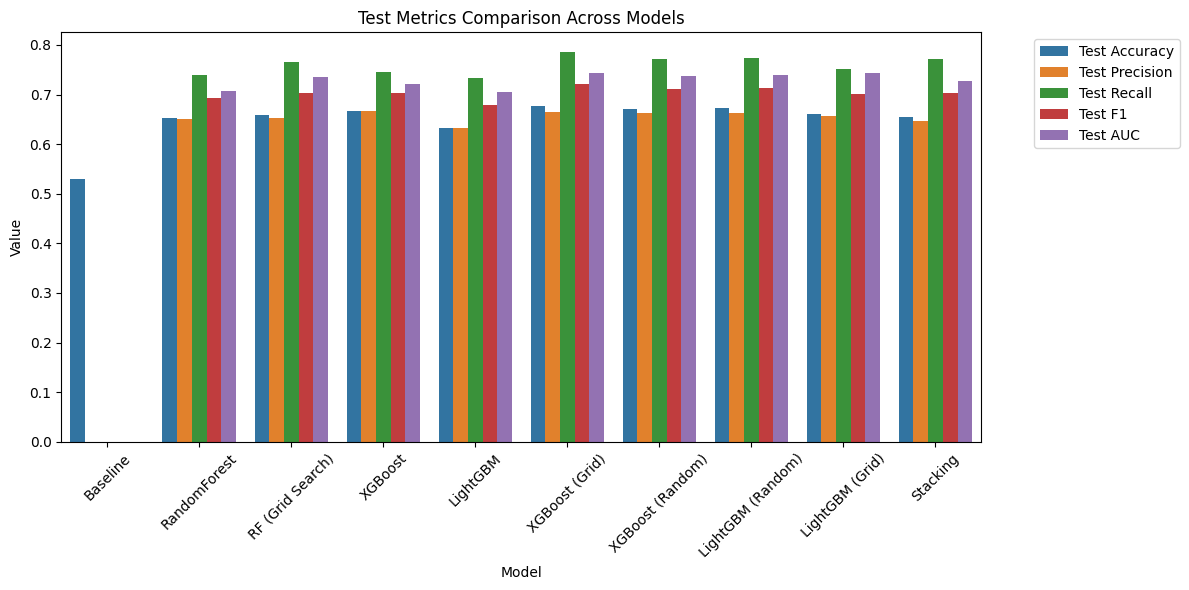

In [73]:
# Create a dictionary with the metrics for each model and visualize results

# For the baseline, only accuracy is available.
data = {
    "Model": [
        "Baseline", 
        "RandomForest", 
        "RF (Grid Search)", 
        "XGBoost", 
        "LightGBM", 
        "XGBoost (Grid)", 
        "XGBoost (Random)", 
        "LightGBM (Random)", 
        "LightGBM (Grid)", 
        "Stacking"
    ],
    "Val Accuracy": [
        0.562,
        0.635,
        0.645,
        0.644,
        0.639,
        0.640,
        0.644,
        0.634,
        0.644,
        0.626
    ],
    "Val Precision": [
        None,
        0.655,
        0.650,
        0.676,
        0.664,
        0.650,
        0.654,
        0.644,
        0.660,
        0.645
    ],
    "Val Recall": [
        None,
        0.743,
        0.798,
        0.702,
        0.722,
        0.778,
        0.778,
        0.778,
        0.754,
        0.743
    ],
    "Val F1": [
        None,
        0.696,
        0.717,
        0.689,
        0.692,
        0.708,
        0.710,
        0.705,
        0.704,
        0.690
    ],
    "Val AUC": [
        None,
        0.674,
        0.697,
        0.702,
        0.700,
        0.698,
        0.698,
        0.697,
        0.699,
        0.687
    ],
    "Test Accuracy": [
        0.530,
        0.652,
        0.658,
        0.667,
        0.632,
        0.677,
        0.670,
        0.672,
        0.660,
        0.655
    ],
    "Test Precision": [
        None,
        0.651,
        0.652,
        0.666,
        0.632,
        0.665,
        0.662,
        0.663,
        0.657,
        0.647
    ],
    "Test Recall": [
        None,
        0.740,
        0.765,
        0.746,
        0.734,
        0.786,
        0.771,
        0.774,
        0.752,
        0.771
    ],
    "Test F1": [
        None,
        0.693,
        0.704,
        0.704,
        0.679,
        0.721,
        0.712,
        0.714,
        0.701,
        0.703
    ],
    "Test AUC": [
        None,
        0.707,
        0.736,
        0.722,
        0.705,
        0.743,
        0.738,
        0.739,
        0.744,
        0.727
    ]
}

# Create a DataFrame from the dictionary
df_metrics = pd.DataFrame(data)
print(df_metrics)

# ------------------------------
# Visualization using Seaborn
# ------------------------------

# For visualization, we will focus on test metrics.
# Melt the DataFrame into long format.
df_melted = df_metrics.melt(
    id_vars=["Model"],
    value_vars=["Test Accuracy", "Test Precision", "Test Recall", "Test F1", "Test AUC"],
    var_name="Metric",
    value_name="Value"
)

plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="Value", hue="Metric", data=df_melted)
plt.title("Test Metrics Comparison Across Models")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

**Conclusions**

- **Overall Improvement Over Baseline:**  
  Every model outperforms the baseline of simply picking the home team as the winner (accuracy 0.53).

- **Best Performing Model:**  
  The Grid Search for XGBoost Model shows the highest test accuracy (0.677) and favorable F1 (0.721) and AUC (0.743) scores. This indicates that with proper hyperparameter tuning, XGBoost effectively captures the predictive signal in the data.

- **Additional Observations:**  
  - Randomized Search for XGBoost and Randomized/Grid Search for LightGBM also yield competitive results (test accuracies around 0.670–0.672 and similar F1/AUC), but the Grid Search XGBoost model remains slightly ahead.  
  - The stacking classifier and simple models, while better than the baseline, do not match the performance of the tuned boosting models.

---

Recommendation

For future NBA game outcome prediction, using an XGBoost model with grid search hyperparameter tuning appears to be the best choice based on the evaluation metrics. It not only improves upon the simple baseline but also outperforms other models in terms of accuracy, F1 score, and AUC ROC.

In [74]:
# Save best trained model to be used for future predictions
import joblib

# Save the trained XGBoost GridSearch model
joblib.dump(best_xgb_grid, "best_xgb_model.pkl")

['best_xgb_model.pkl']

#### RNN Model Data Preprocessing

In [63]:
from sklearn.preprocessing import MinMaxScaler
import torch

# -----------------------------------------------------------------------------
# 1. Create a copy and remove rolling stats columns
# -----------------------------------------------------------------------------
rnn_df = team_aggregated_df.copy()
rnn_df = rnn_df[[col for col in rnn_df.columns if not col.endswith("rolling15")]]

# -----------------------------------------------------------------------------
# 2. Remove or Encode Non-Numeric Columns
# -----------------------------------------------------------------------------
# Define non-numeric columns that are not needed as features
non_numeric_cols = ['game_id', 'team_name', 'prev_game_city', 'game_city', 'win_category']
rnn_df = rnn_df.drop(columns=non_numeric_cols)

# Ensure binary columns are numeric
rnn_df['is_home_game'] = rnn_df['is_home_game'].astype(int)
rnn_df['game_postseason'] = rnn_df['game_postseason'].astype(int)

# -----------------------------------------------------------------------------
# 3. Sort the DataFrame by team_id and date
# -----------------------------------------------------------------------------
rnn_df = rnn_df.sort_values(by=["team_id", "date"]).reset_index(drop=True)

# -----------------------------------------------------------------------------
# 4. Impute Missing Values for Specific Columns
# -----------------------------------------------------------------------------
# For win_streak: first game for each team gets a default win streak of 0.
rnn_df["win_streak"] = rnn_df["win_streak"].fillna(0)

# For days_since_last_game: impute 0 (or use an alternative like the median gap if preferred)
rnn_df["days_since_last_game"] = rnn_df["days_since_last_game"].fillna(0)

# For travel_distance: 
rnn_df["travel_distance"] = rnn_df["travel_distance"].fillna(0)

# -----------------------------------------------------------------------------
# 5. Scale the Data
# -----------------------------------------------------------------------------
target_col = "game_won"  # Adjust if necessary
# Exclude identifier and target columns from the features
feature_cols = [col for col in rnn_df.columns if col not in ["team_id", "date", target_col]]

# Ensure feature columns are float for scaling
dtype_dict = {col: 'float64' for col in feature_cols}
rnn_df = rnn_df.astype(dtype_dict)

# Scale features using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
rnn_df[feature_cols] = scaler.fit_transform(rnn_df[feature_cols])

# Ensure target column is int
rnn_df[target_col] = rnn_df[target_col].astype(int)

# -----------------------------------------------------------------------------
# 6. Create Sequences for RNN Training
# -----------------------------------------------------------------------------
def create_team_sequences(df, team_id, feature_cols, target_col, seq_length):
    """
    Create sequences for a given team with `seq_length` consecutive games
    and the target as the outcome of the game immediately following the sequence.
    """
    team_df = df[df["team_id"] == team_id].reset_index(drop=True)
    X, y = [], []
    for i in range(len(team_df) - seq_length):
        X.append(team_df[feature_cols].iloc[i:i+seq_length].values)
        y.append(team_df[target_col].iloc[i+seq_length])
    return np.array(X), np.array(y)

def create_all_sequences(df, feature_cols, target_col, seq_length):
    """
    Create sequences for all teams in the DataFrame and concatenate them.
    """
    X_all, y_all = [], []
    for team in df["team_id"].unique():
        X_team, y_team = create_team_sequences(df, team, feature_cols, target_col, seq_length)
        if len(X_team) > 0:
            X_all.append(X_team)
            y_all.append(y_team)
    return np.concatenate(X_all, axis=0), np.concatenate(y_all, axis=0)

# Define the sequence length (e.g., 15 games)
seq_length = 15
X_all, y_all = create_all_sequences(rnn_df, feature_cols, target_col, seq_length)

# -----------------------------------------------------------------------------
# 7. Convert to PyTorch Tensors
# -----------------------------------------------------------------------------
X_tensor = torch.tensor(X_all, dtype=torch.float32)
y_tensor = torch.tensor(y_all, dtype=torch.float32)

# Validation Checks
print(f"X_tensor shape: {X_tensor.shape}, y_tensor shape: {y_tensor.shape}")
print(f"Missing values in X_tensor: {torch.isnan(X_tensor).sum().item()}")
print(f"Missing values in y_tensor: {torch.isnan(y_tensor).sum().item()}")

X_tensor shape: torch.Size([11726, 15, 52]), y_tensor shape: torch.Size([11726])
Missing values in X_tensor: 0
Missing values in y_tensor: 0


#### RNN Model Training

In [64]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader, random_split

# ------------------------------
# Hyperparameters
# ------------------------------
input_size = X_tensor.shape[2]   # number of features, e.g., 52
hidden_size = 128                 # adjust as needed
num_layers = 3                    # number of LSTM layers
num_epochs = 100                   # total epochs for training
batch_size = 128                  # mini-batch size
learning_rate = 0.0001           # learning rate

# ------------------------------
# Define the RNN Model (LSTM-based)
# ------------------------------
class RNNClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(RNNClassifier, self).__init__()
        # LSTM layer: batch_first=True means input/output tensors are of shape (batch, seq, feature)
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        # Fully-connected layer maps the final LSTM output to a single value
        self.fc = nn.Linear(hidden_size, 1)
        # Sigmoid activation for binary classification
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        # x: (batch, seq_length, input_size)
        # Get LSTM outputs; we only need the output at the final time step
        out, (hn, cn) = self.lstm(x)
        out = out[:, -1, :]         # shape: (batch, hidden_size)
        out = self.fc(out)          # shape: (batch, 1)
        out = self.sigmoid(out)     # shape: (batch, 1)
        return out

model = RNNClassifier(input_size, hidden_size, num_layers)

# ------------------------------
# Loss Function and Optimizer
# ------------------------------
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# ------------------------------
# Prepare DataLoaders
# ------------------------------
# The target tensor needs an extra dimension to match the model output.
dataset = TensorDataset(X_tensor, y_tensor.unsqueeze(1))  # y_tensor becomes (N,1)

# Split into training and validation sets (80% train, 20% val)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# ------------------------------
# Initialize Lists for Metrics
# ------------------------------
train_losses = []
val_losses = []
val_accuracies = []

# ------------------------------
# Training Loop
# ------------------------------
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()                # Clear gradients
        outputs = model(batch_X)               # Forward pass
        loss = criterion(outputs, batch_y)     # Compute loss
        loss.backward()                        # Backward pass
        optimizer.step()                       # Update weights
        
        running_loss += loss.item() * batch_X.size(0)
    
    epoch_loss = running_loss / train_size
    train_losses.append(epoch_loss)
    
    # Evaluate on validation set
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_X, batch_y in val_loader:
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            val_loss += loss.item() * batch_X.size(0)
            
            # Convert probabilities to binary predictions (threshold = 0.5)
            predicted = (outputs >= 0.5).float()
            total += batch_y.size(0)
            correct += (predicted == batch_y).sum().item()
    
    val_loss = val_loss / val_size
    val_losses.append(val_loss)
    val_accuracy = correct / total
    val_accuracies.append(val_accuracy)
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_loss:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}")

# Now, train_losses, val_losses, and val_accuracies contain the metrics for each epoch.

Epoch [1/100], Train Loss: 0.6927, Val Loss: 0.6915, Val Acc: 0.5009
Epoch [2/100], Train Loss: 0.6843, Val Loss: 0.6694, Val Acc: 0.6032
Epoch [3/100], Train Loss: 0.6717, Val Loss: 0.6636, Val Acc: 0.6002
Epoch [4/100], Train Loss: 0.6706, Val Loss: 0.6657, Val Acc: 0.6074
Epoch [5/100], Train Loss: 0.6715, Val Loss: 0.6686, Val Acc: 0.5899
Epoch [6/100], Train Loss: 0.6704, Val Loss: 0.6645, Val Acc: 0.6057
Epoch [7/100], Train Loss: 0.6702, Val Loss: 0.6627, Val Acc: 0.5921
Epoch [8/100], Train Loss: 0.6696, Val Loss: 0.6622, Val Acc: 0.5853
Epoch [9/100], Train Loss: 0.6695, Val Loss: 0.6649, Val Acc: 0.5946
Epoch [10/100], Train Loss: 0.6713, Val Loss: 0.6628, Val Acc: 0.5955
Epoch [11/100], Train Loss: 0.6698, Val Loss: 0.6632, Val Acc: 0.5861
Epoch [12/100], Train Loss: 0.6692, Val Loss: 0.6631, Val Acc: 0.5878
Epoch [13/100], Train Loss: 0.6696, Val Loss: 0.6624, Val Acc: 0.5891
Epoch [14/100], Train Loss: 0.6695, Val Loss: 0.6624, Val Acc: 0.5861
Epoch [15/100], Train Loss: 0

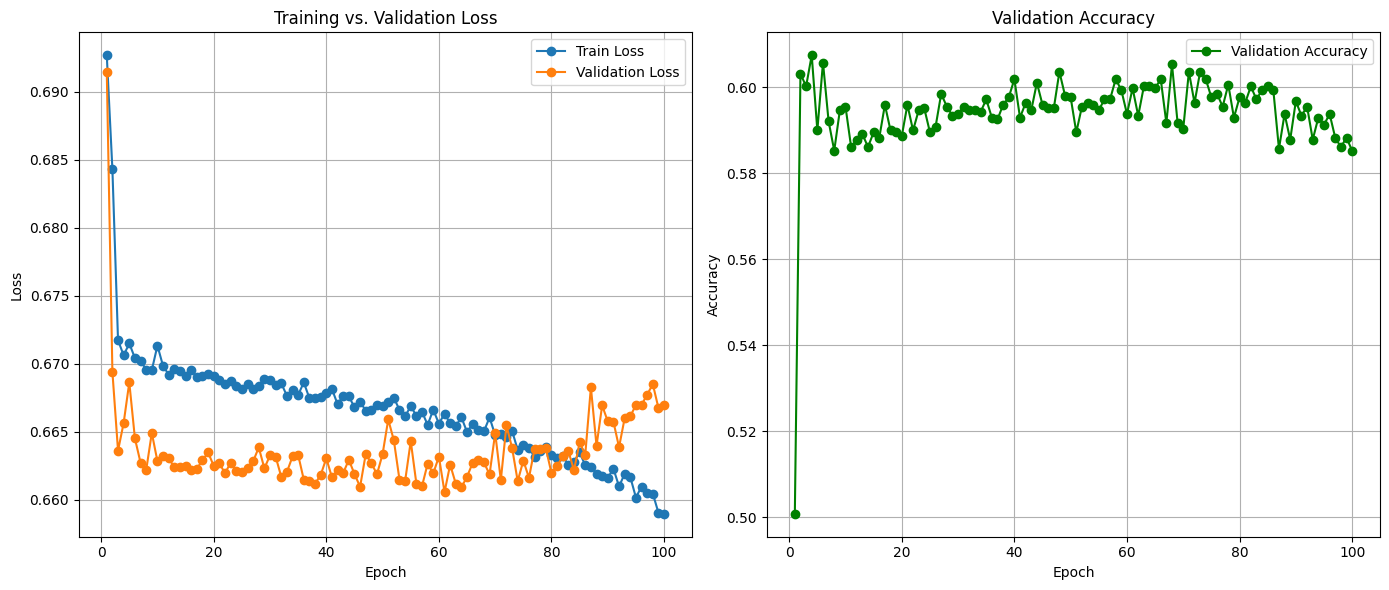

In [65]:
# ------------------------------
# Plot Learning Curves
# ------------------------------

plt.figure(figsize=(14, 6))

epochs = list(range(1, num_epochs+1))

# Plot Training and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label="Train Loss", marker='o')
plt.plot(epochs, val_losses, label="Validation Loss", marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs. Validation Loss")
plt.legend()
plt.grid(True)

# Plot Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, val_accuracies, label="Validation Accuracy", color='green', marker='o')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Validation Accuracy")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

After experimenting with hyperparamters, especially learning rate and network layers and size, the RNN shows:

- **Modest Improvement:**
  - The training loss decreased modestly from about 0.6928 to 0.6601 over 100 epochs.
  - The validation loss shows a small improvement (hovering around 0.665–0.670) while validation accuracy plateaus around 58–59%.

- **Limited Gain Over Baseline:**
  - The accuracy is only marginally above the simple baseline model that picks home team as winner.
  - This suggests that the sequential information captured by your RNN isn’t adding substantial predictive power compared to simpler models.

- **Possible Underutilization of Sequential Data:**
  - Although the data is chronologically ordered and sequences are built with 15 games per sample, the features might not have strong temporal dynamics for the RNN to exploit.
  - The RNN architecture might not be the best fit for this type of aggregated, tabular game data.

- **Dataset Size and Complexity:**
  - With around 6000 games split into sequences across multiple teams, the effective dataset for the RNN may be too limited for a deep sequential model to generalize well.

Overall, these findings indicate that, given the current features and dataset size, simpler models like LGBM might be more effective than an RNN for NBA game outcome prediction.

# Notebook Summary and Conclusions

## Overview
In this notebook, we explored NBA advanced game statistics and box scores, incorporating several new features to enrich the dataset. These features included:

- **Advanced Metrics:** ELO ratings, rest days, absent players, absent player impact, time-in-season.
- **Additional Contextual Data:** Distance travelled and various rolling statistics.
- **Box Score Stats:** Traditional performance measures extracted from game box scores.

## Data Exploration and Feature Engineering
- **Data Aggregation:**  
  We aggregated and preprocessed player game-level data to team game-level data, ensuring that each game was enriched with advanced stats and contextual features.
  
- **Feature Creation:**  
  - Computed rolling statistics over a specified window (e.g., 15 games).
  - Added advanced metrics such as ELO ratings, rest days, absent player impact, time-in-season, and distance travelled.
  - Handled missing values (e.g., imputing travel distance and inferring missing city information based on home games).

- **Data Preparation for Modeling:**  
  We normalized the features using MinMaxScaler and reshaped the data into sequences for the RNN, while also preparing a tabular dataset for classic classifiers.

## Modeling Approaches
- **Baseline Model:**  
  A simple baseline that always predicts the home team wins (accuracy ~0.53).

- **Classic Classifiers:**  
  - **RandomForest:** Both a simple RandomForest and a version tuned via grid search.
  - **Boosting Models:**  
    - **XGBoost and LightGBM:** Evaluated using both grid search and randomized search to optimize hyperparameters.
  - **Stacking Classifier:**  
    An ensemble combining multiple classifiers was also tested.

- **Recurrent Neural Network (RNN):**  
  A sequential model (using an LSTM architecture) was built and trained on sequential game data.

## Conclusions and Recommendation
- **Overall Improvement:**  
  Every model outperforms the simple baseline, but boosting models show the most promise.
  
- **Best Performing Model:**  
  The Grid Search XGBoost model achieved the highest test accuracy (0.677), along with favorable F1 (0.721) and AUC (0.743) scores, indicating that it effectively captures the predictive signal in the data when properly tuned.

- **Sequential Models vs. Classic Models:**  
  The RNN did not add sufficient predictive power compared to classic classifiers, likely due to the nature of aggregated, tabular data and the limited effective dataset size for deep sequential modeling.

- **Future Prediction Strategy:**  
  Based on the evaluation metrics and overall performance, **the Grid Search XGBoost model will be used for future NBA game outcome prediction.**

Overall, our experiments show that, given the dataset and features at hand, a well-tuned boosting model (specifically XGBoost with grid search) outperforms both simpler classifiers and a deep sequential model (RNN) for predicting NBA game outcomes.